# Using Machine Learning Tools 2023, Assignment 3

## Sign Language Image Classification using Deep Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;

 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.


It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

In addition, you are told to **create a validation set and any necessary test sets using _only_ the supplied testing dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)

Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis.
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Common imports
import numpy as np
import os, time
import pandas as pd

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()

# Loading and initial visualisation

In [38]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [40]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [41]:
print(f'Number of images in the training dataset : {train_df.shape[0]}')
print(f'Number of images in the test dataset : {test_df.shape[0]}')

dim = int((train_df.shape[1]-1)**0.5)
print(f'Dimensions of the images : {dim} x {dim}')

print("Max value of the train dataframe", train_df.max().max())
print("Min value of the train dataframe", train_df.min().min())

Number of images in the training dataset : 26617
Number of images in the test dataset : 7172
Dimensions of the images : 28 x 28
Max value of the train dataframe 255.0
Min value of the train dataframe 0.0


In [42]:
#checking for Nan values
print("Nan values in training dataset :",train_df.isnull().values.any())
print("Nan values in testing dataset :",test_df.isnull().values.any())

Nan values in training dataset : True
Nan values in testing dataset : False


In [43]:
# dropping any null value rows
null_rows_train = train_df.isnull().sum(axis=1)
null_rows_test = test_df.isnull().sum(axis=1)
total_null_rows_train = null_rows_train.sum()
total_null_rows_test = null_rows_test.sum()
print(total_null_rows_train)
print(total_null_rows_test)
train_df=train_df.dropna()
test_df=test_df.dropna()

238
0


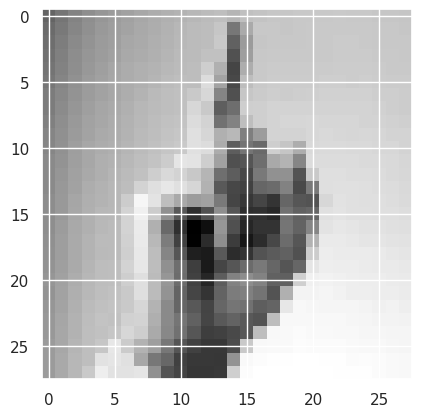

In [44]:
# display image method
def to_image(array, label=True):
    array = np.array(array)
    start_index = 1 if label else 0
    return array[start_index:].reshape(28,28).astype(float)

# single image
image = to_image(train_df.iloc[0])
plt.imshow(image, cmap='gray')
plt.show()

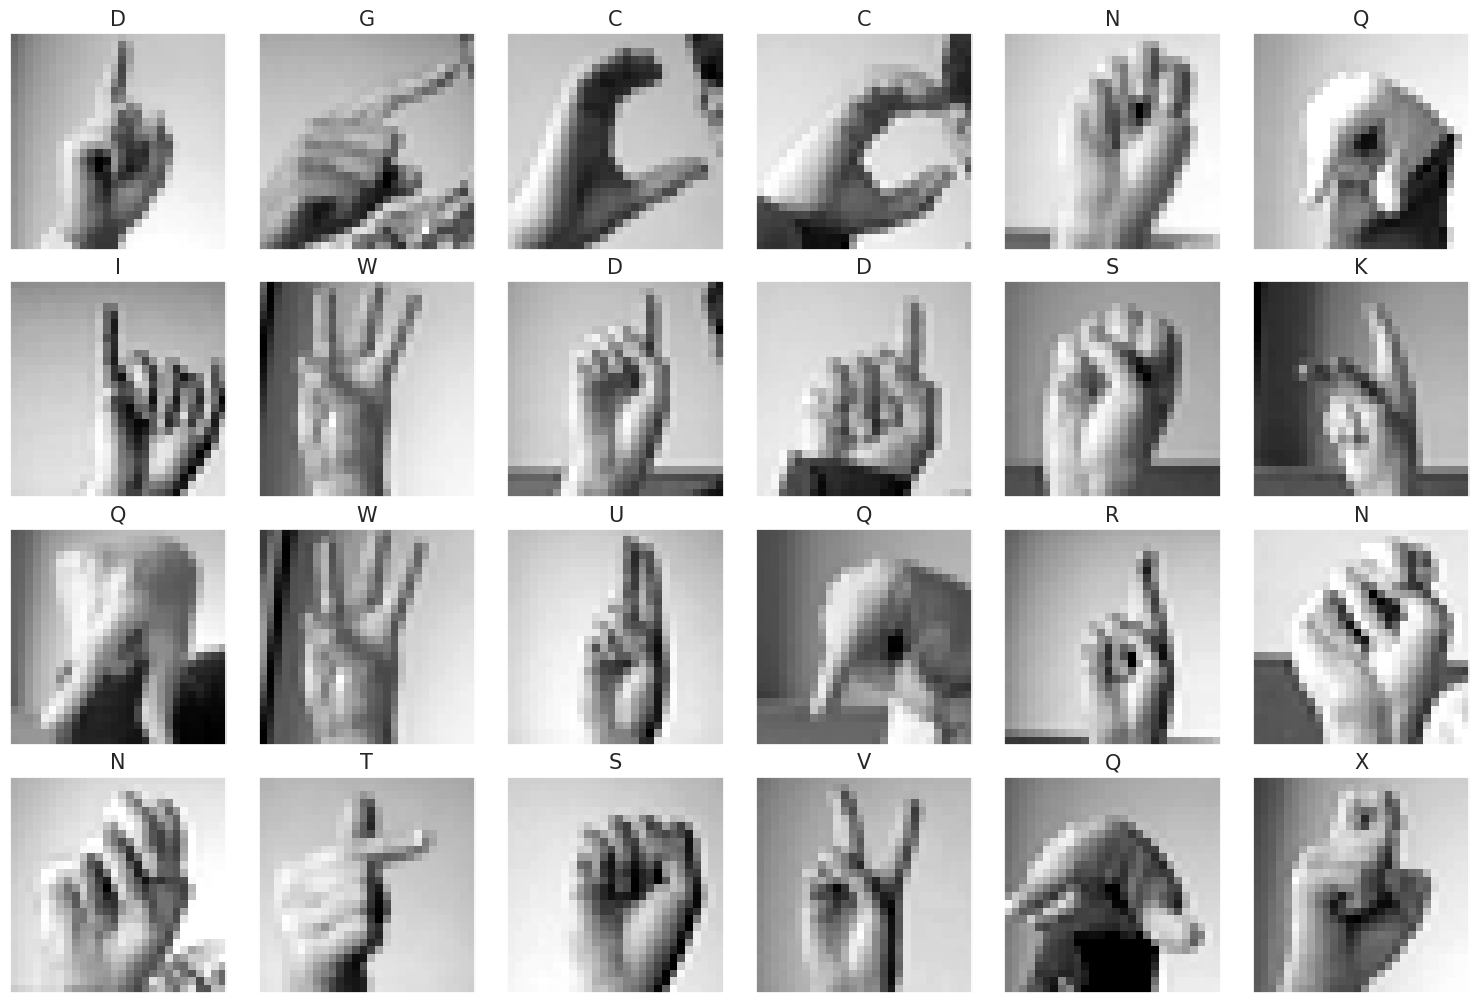

In [45]:
# class mapping to letters
class_values='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letter_mapping ={}

for idx,letter in enumerate(class_values):
    letter_mapping[idx]=letter

## sample view of the data
fig, axes = plt.subplots(nrows=4,
ncols=6,
figsize=(15,10),
subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axes.flat):
    image=to_image(train_df.loc[i])
    ax.imshow(image ,cmap='gray')
    ax.set_title(letter_mapping[train_df.label[i]], fontsize=15)
plt.tight_layout(pad=0.5)
plt.show()

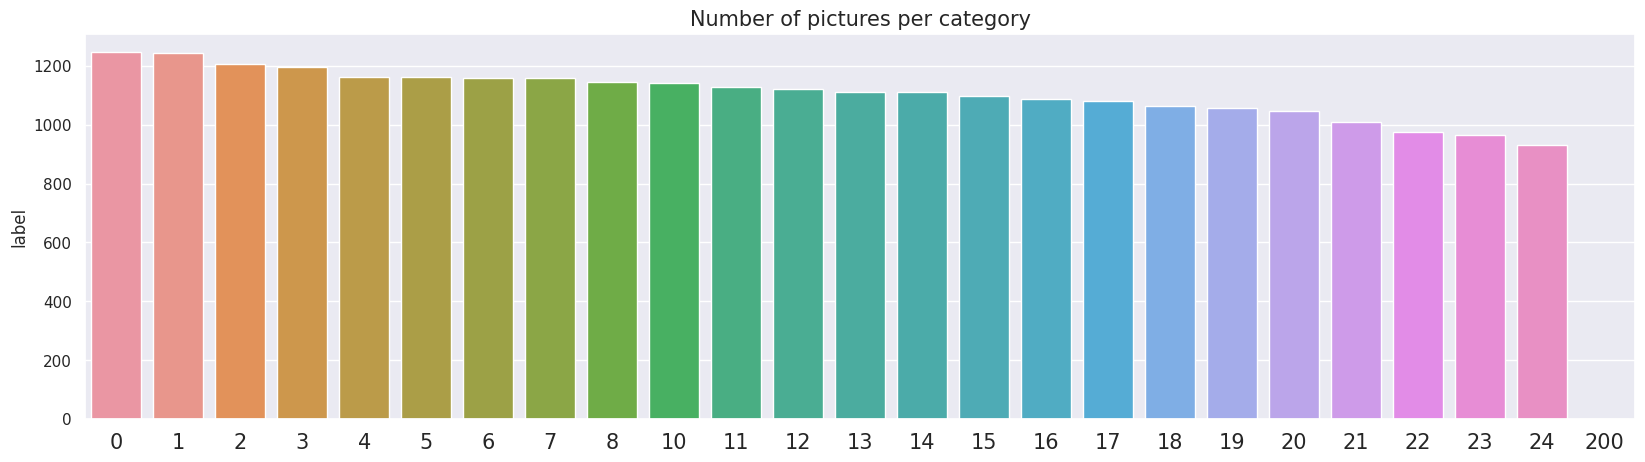

In [46]:
# Class balance in each of the data sets
def class_plot(label):
    value_count = label.value_counts()
    plt.figure(figsize=(20,5))
    sns.barplot(x=sorted(value_count.index), y=value_count)
    plt.title("Number of pictures per category", fontsize=15)
    plt.xticks(fontsize=15)
    plt.show

# for training
class_plot(train_df['label'])

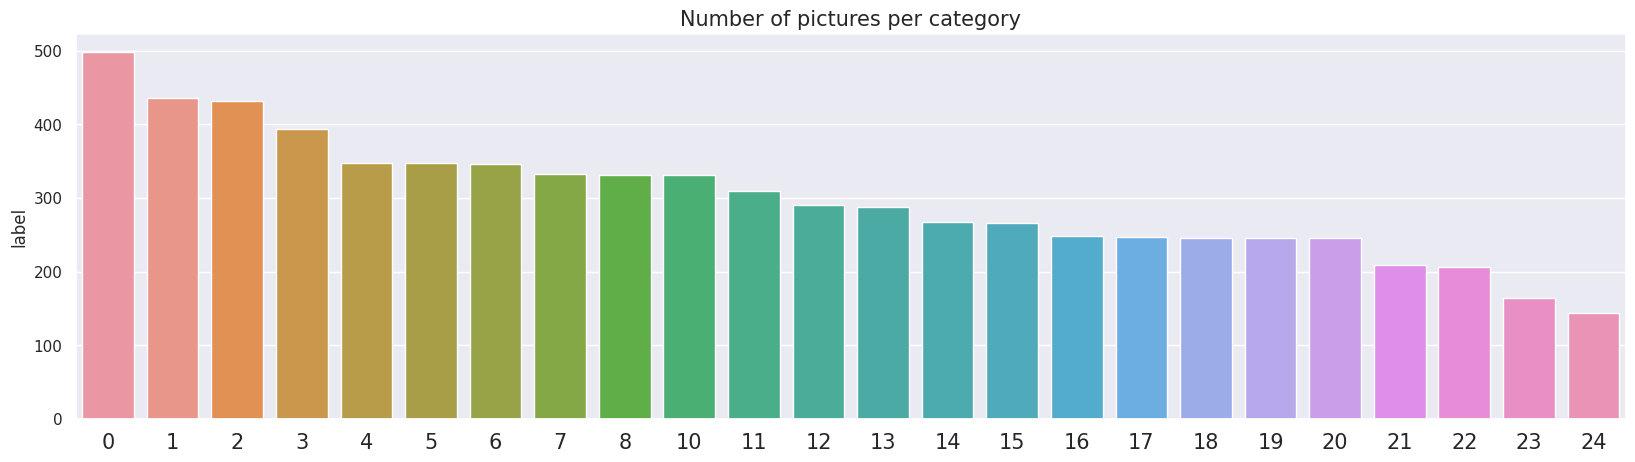

In [47]:
class_plot(test_df['label'])

In [48]:
## Dropping the tuples that is out of range
out_of_range_rows=train_df[train_df['label']>24]
train_df.drop(out_of_range_rows.index,inplace=True)

# Discussion

As there appears to be only one tuple in the training dataset that has its "label" misclassified, therefore it can be removed from the dataset as it will not significantly affect the outcome.

In addition based on the histogram, it appears that the training dataset has a fair distribution of sample numbers, while the test dataset is a bit unbalanced.

# Data extraction and splitting

In [49]:
# extracting target variable
y_train=train_df['label']
y_test = test_df['label']

# reshaping dataset
X_train=train_df.drop('label',axis=1).values.reshape(train_df.shape[0],28,28)
X_test=test_df.drop('label',axis=1).values.reshape(test_df.shape[0],28,28)

print(X_train.shape)
print(X_test.shape)

(26615, 28, 28)
(7172, 28, 28)


In [50]:
from sklearn.model_selection import train_test_split
# Divide training values by 255 -> new ranges (0 - 1)
X_train = X_train/255.0
# Split data in test (5000) and validation (2172)
X_test=X_test/255.0
X_test, X_valid,y_test, y_valid = train_test_split(X_test,y_test,test_size=0.3,random_state=42)
# X_test, X_valid = X_test[:5000]/255, X_test[5000:]/255
# y_test, y_valid = y_test[:5000], y_test[5000:]

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_test.shape)
print(y_valid.shape)

(26615, 28, 28)
(5020, 28, 28)
(2152, 28, 28)
(5020,)
(2152,)


In [53]:
## if assuming that overall accuracy of every class got exactly 90% accuracy

class_count={}
for key in letter_mapping.keys():
    class_count[key]=0

for value in y_test:
    class_count[value]+=1

sum=0
for value in class_count.values():
    sum+=(value//100*90)


sum=sum/y_test.shape[0]
print(sum)

0.6633466135458167


# Baseline model

In [54]:
# General baseline model
base_model=keras.models.Sequential()
base_model.add(keras.layers.Flatten(input_shape = [28 , 28]))   # our inputs are 28 x 28 arrays, so need to become 1D
base_model.add(keras.layers.Dense(300, activation = "relu"))    # first hidden layer
base_model.add(keras.layers.Dense(100, activation = "relu"))    # second hidden layer
base_model.add(keras.layers.Dense(25, activation = "softmax"))  # output layer
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 25)                2525      
                                                                 
Total params: 268,125
Trainable params: 268,125
Non-trainable params: 0
_________________________________________________________________


In [55]:
base_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = base_model.fit(X_train, y_train, epochs=25, validation_data=(X_valid,y_valid))

Epoch 1/25
832/832 [==============================] - 5s 6ms/step - loss: 2.6286 - accuracy: 0.2596 - val_loss: 2.2047 - val_accuracy: 0.3072
Epoch 2/25
832/832 [==============================] - 9s 11ms/step - loss: 1.7157 - accuracy: 0.4976 - val_loss: 1.6516 - val_accuracy: 0.5019
Epoch 3/25
832/832 [==============================] - 8s 9ms/step - loss: 1.2968 - accuracy: 0.6142 - val_loss: 1.5274 - val_accuracy: 0.5172
Epoch 4/25
832/832 [==============================] - 6s 7ms/step - loss: 1.0444 - accuracy: 0.6890 - val_loss: 1.2779 - val_accuracy: 0.6008
Epoch 5/25
832/832 [==============================] - 4s 5ms/step - loss: 0.8747 - accuracy: 0.7395 - val_loss: 1.1380 - val_accuracy: 0.6194
Epoch 6/25
832/832 [==============================] - 5s 6ms/step - loss: 0.7430 - accuracy: 0.7791 - val_loss: 1.2252 - val_accuracy: 0.6208
Epoch 7/25
832/832 [==============================] - 5s 6ms/step - loss: 0.6374 - accuracy: 0.8122 - val_loss: 1.0015 - val_accuracy: 0.6743
Epoch

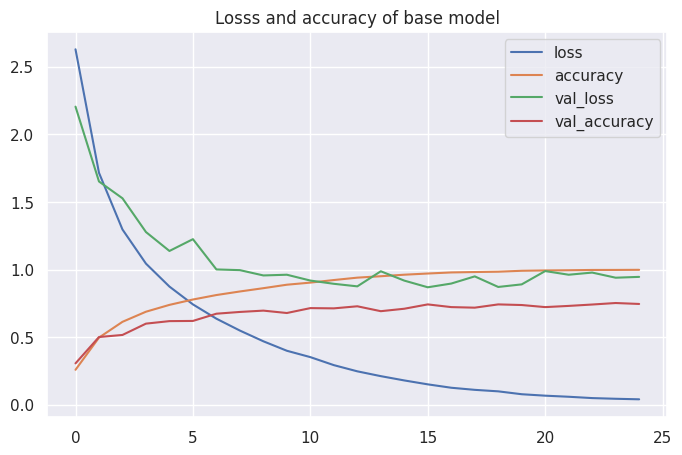

In [57]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.title("Losss and accuracy of base model")
plt.show()

In [58]:
### loss and accuracy against test data
testres = base_model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {testres[0]}')
print(f'Accuracy: {testres[1]}')
print(testres)

Loss: 1.0700273513793945
Accuracy: 0.7446215152740479
[1.0700273513793945, 0.7446215152740479]


1/1 [==============================] - 0s 116ms/step
Predictions: [24 17  7]
Prediction labels: ['Y', 'R', 'H']
True labels: ['K', 'R', 'W']


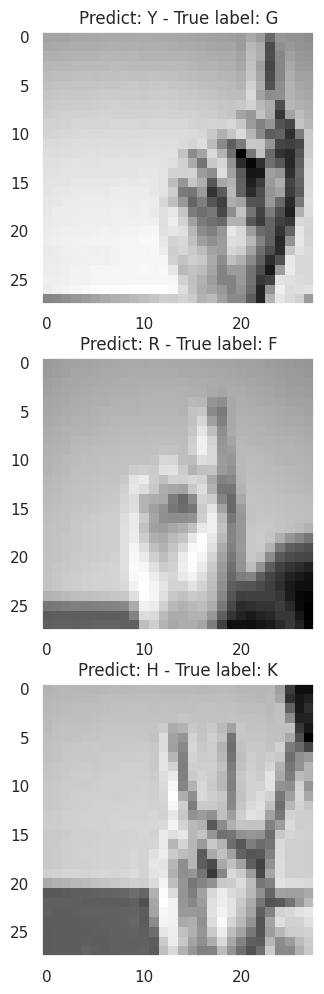

In [59]:
# Base model prediction output class predictions inspection
predict_x = base_model.predict(X_test[:3])  # use the first three test cases as an example
classes_x=np.argmax(predict_x,axis=1)
print(f'Predictions: {classes_x}')   # predicted classes
print(f'Prediction labels: {[letter_mapping[x] for x in classes_x]}')   # names of these classes (prediction)
print(f'True labels: {[letter_mapping[y] for y in y_test[:3]]}')   # names of true classes
# Display an image of the test samples

fig, ax = plt.subplots(len(predict_x), figsize=(16,12))
for i in range(len(predict_x)):
  ax[i].imshow(X_test[i].reshape((28,28)), cmap="gray")
  ax[i].set_title(f'Predict: {letter_mapping[classes_x[i]]} - True label: {letter_mapping[y_test[i]]}')
  ax[i].grid(False)

# Discussion

The base model did not perform well with simple Dense layers, as its accuracy is only 64.68%, suggesting that it didn't capture the underlying idea and is trying to overfit.

# Optimisation

In [60]:
### Reshaping the data
X_train=X_train.reshape((-1,28,28,1))
X_valid=X_valid.reshape((-1,28,28,1))
X_test=X_test.reshape((-1,28,28,1))

In [61]:
# CNN model factory for model creation
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3,
                                  strides=1, activation=actfn, padding="same",
                                  input_shape=[28, 28, 1]))
                                  # input layer goes into this 2D convolution
    model.add(keras.layers.MaxPooling2D(pool_size=2))     # Pool (downsize)
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1,
                                      padding="same", activation=actfn))
                                      # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2)) # Pool (downsize)
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3,
                                  strides=1, padding="same", activation=actfn))
                                  # 2nd Conv
    model.add(keras.layers.Flatten())          # unravel into a 1D vector
    model.add(keras.layers.Dense(25, activation = "softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [74]:
# Densely connected model factory for model creation
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28 , 28, 1]))
    model.add(keras.layers.Dense(hiddensizes[0], activation=actfn, input_shape=[28,28,1]))

    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Dense(n, activation='relu'))

    model.add(keras.layers.Dense(hiddensizes[-1], activation=actfn))
    model.add(keras.layers.Dense(25, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])

    return model

In [63]:
# method for model fitting and metrics
def fit_evaluate(model, n_epochs, batch_size=None, callbacks=[]):
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_valid, y_valid),verbose=1, batch_size=batch_size)
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test, y_test, verbose=0)
    # Check here that we are returning the max accuracy, the performance in test, the history, and the model
    return (max_val_acc, testres, history, model)

In [64]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=5,
                                                  restore_best_weights=True)

In [65]:
# Plot the results
def plot_history(history):
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show()

In [66]:
# To display the false prediction confusion matrix and
# to display the percentage correct prediction for each class.
from collections import Counter

def matrice(prediction, trueVal):
  mapping=np.zeros((26,26))
  count=[0]*26
  y_count=Counter(trueVal)
  y_count[9]=0
  y_count[25]=0
  letters=np.array([letter for letter in class_values])
  for i,val in enumerate(trueVal):
    if prediction[i]==val:
      # mapping[val][prediction[i]]+=1
      count[val]+=1
    else:
      mapping[val][prediction[i]]+=1

  plt.subplots(figsize=(15,15))
  axe =sns.heatmap(mapping,annot=True)
  axe.set_xticklabels(letters)
  axe.set_yticklabels(letters, rotation=0, horizontalalignment='right')
  plt.xlabel('Prediction')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  count_Array=np.array(count)
  test_Array=np.array(sorted(y_count.items()))[:,1]
  test_class = [(count_Array[i]/test_Array[i])*100 if count_Array[i]!=0 else 0 for i in range(len(count_Array))]

  plt.figure(figsize=(15, 11))
  plt.ylabel('Labels', fontsize = 15)
  plt.xlabel('Accuracy', fontsize = 15)
  plt.title('Classes prediction accuracy', fontsize = 20)
  plt.barh(letters, test_class, facecolor='g')
  for index, value in enumerate(test_class):
      plt.text(value, index, f"{str(value):.05}")

In [67]:
# A method to call methods defined above in order
def execute(model, n_epochs, batch_size,learn_rate,callback=None,summary=False):
    if callback !=None:
        callbacks=callback
    else:
        callbacks = early_stopping_cb

    max_val_acc, testres, history, model=fit_evaluate(model, n_epochs, batch_size, callbacks)

    if summary:
        model.summary()

    ## plotting loss curve
    plot_history(history)

    print(f"Best validation accuracy: {max_val_acc:.3f}")
    print(f'Loss against test set:',testres[0])
    print(f'Accuracy against test set:',testres[1])

    prediction=model.predict(X_test)
    values = np.argmax(prediction,axis=1)

    # plotting confusion matrix
    matrice(values,y_test)
    return max_val_acc

In [71]:
# parameter definition
n_epochs=25
batch_size=32
learn_rate=0.001
actfn="elu"
optimiser=keras.optimizers.Adamax
hidden_sizes=[16,32,16]


## Initial CNN model

In [72]:
# initial cnn model definition
cnn_model = model_cnn_factory(hidden_sizes,actfn,optimiser,learn_rate)
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 flatten_3 (Flatten)         (None, 784)              

Epoch 1/25
832/832 [==============================] - 34s 40ms/step - loss: 1.7744 - accuracy: 0.4939 - val_loss: 1.0251 - val_accuracy: 0.6896
Epoch 2/25
832/832 [==============================] - 31s 38ms/step - loss: 0.5604 - accuracy: 0.8273 - val_loss: 0.7292 - val_accuracy: 0.7663
Epoch 3/25
832/832 [==============================] - 33s 40ms/step - loss: 0.2842 - accuracy: 0.9144 - val_loss: 0.5581 - val_accuracy: 0.8401
Epoch 4/25
832/832 [==============================] - 31s 38ms/step - loss: 0.1487 - accuracy: 0.9597 - val_loss: 0.5396 - val_accuracy: 0.8392
Epoch 5/25
832/832 [==============================] - 31s 37ms/step - loss: 0.0752 - accuracy: 0.9846 - val_loss: 0.5632 - val_accuracy: 0.8513
Epoch 6/25
832/832 [==============================] - 32s 38ms/step - loss: 0.0376 - accuracy: 0.9952 - val_loss: 0.5203 - val_accuracy: 0.8680
Epoch 7/25
832/832 [==============================] - 41s 49ms/step - loss: 0.0203 - accuracy: 0.9980 - val_loss: 0.6010 - val_accuracy:

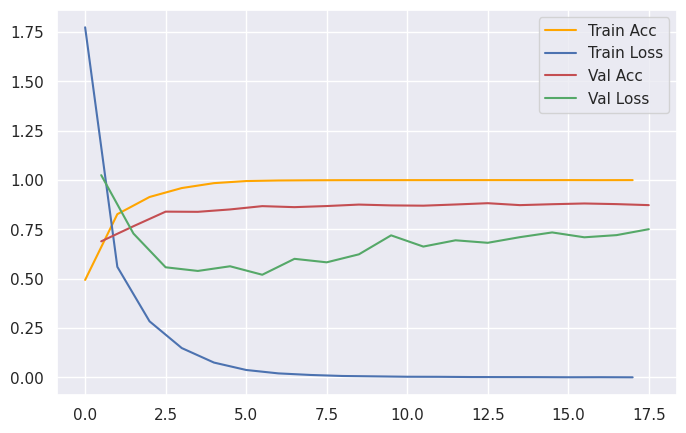

Best validation accuracy: 0.883
Loss against test set: 0.7817590236663818
Accuracy against test set: 0.8695219159126282
157/157 [==============================] - 2s 11ms/step


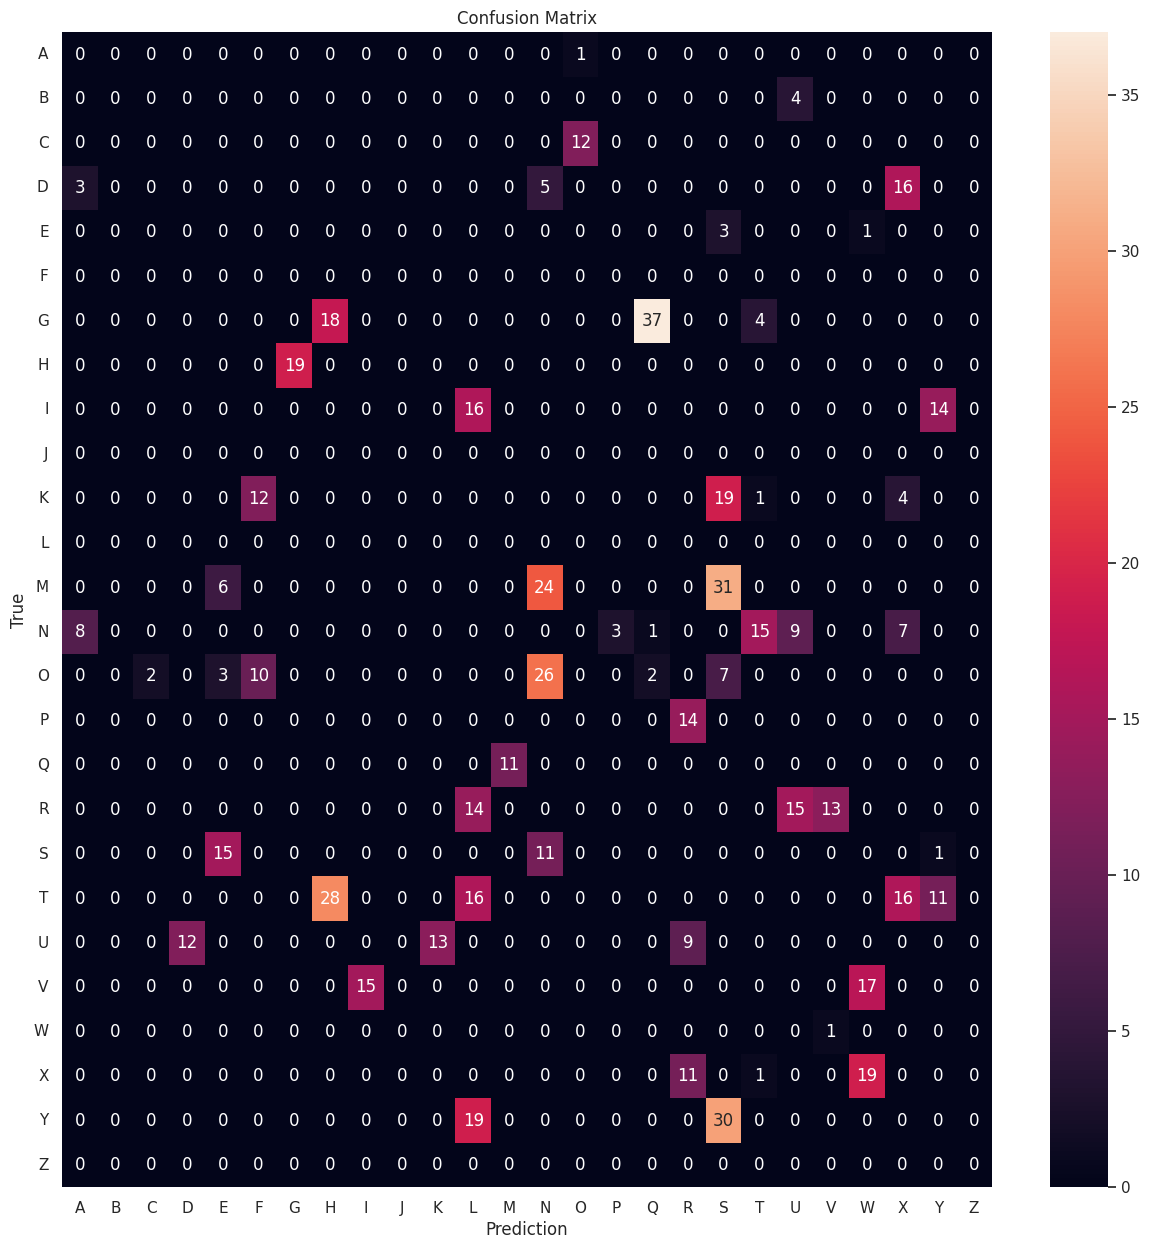

0.8828996419906616

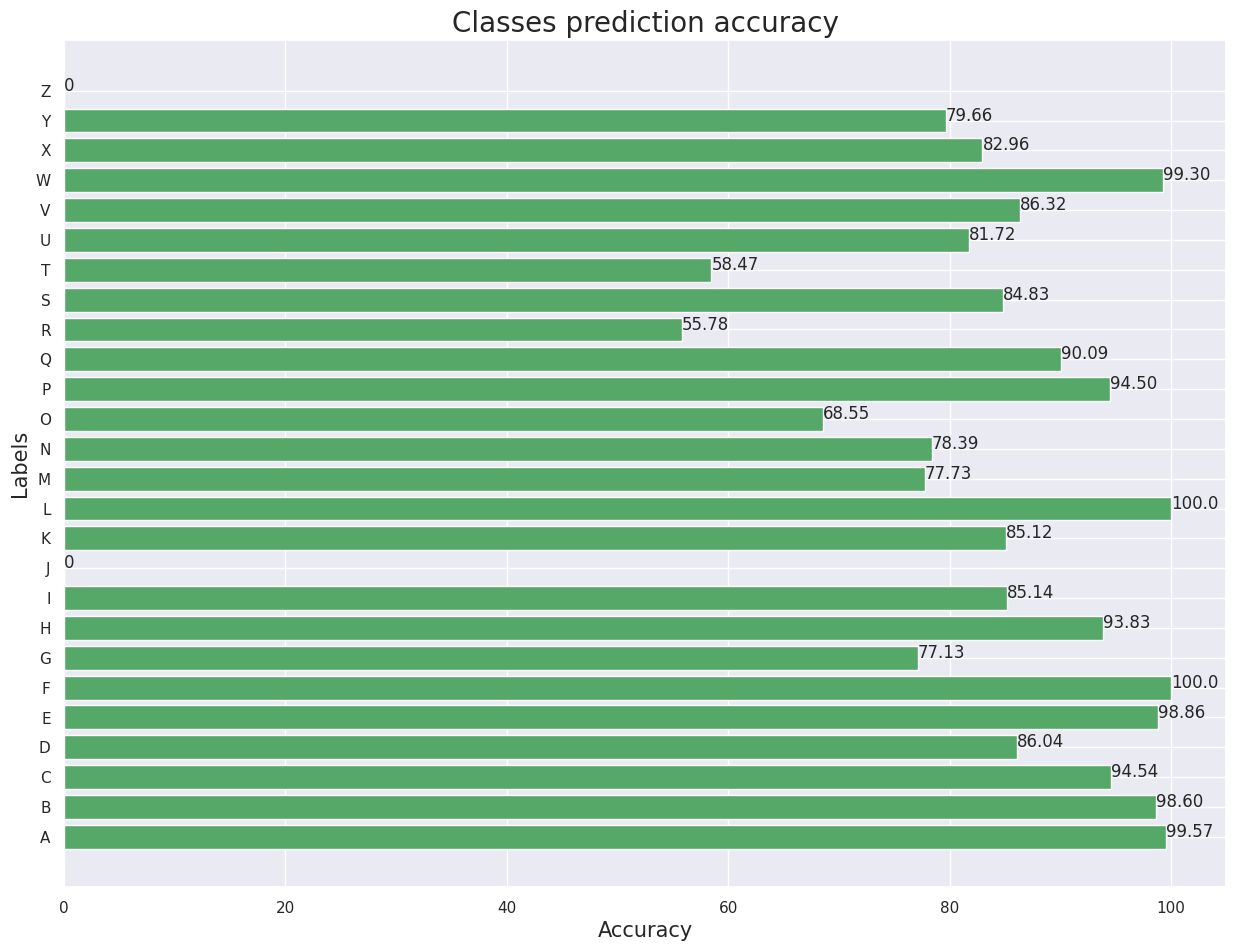

In [73]:
# initial cnn model execution
execute(cnn_model, n_epochs, batch_size,learn_rate)

### Initial CNN model evaluation

The initial cnn model gives the following scoring:

* Best validation accuracy: 0.883

* Loss against test set: 0.782

* Overall accuracy against test set: 0.8695

Classification

* Best correctly classified letter/s: F and L

* Least correctly classified letter/s : R and very closely T

* Most commonly misclassified letter/s: G classified as Q

## Initial Densely connected model

In [75]:
dense_model = model_dense_factory(hidden_sizes,actfn,optimiser,learn_rate)
dense_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 25)                425       
                                                                 
Total params: 14,057
Trainable params: 14,057
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
832/832 [==============================] - 7s 6ms/step - loss: 2.7299 - accuracy: 0.1647 - val_loss: 2.3643 - val_accuracy: 0.2607
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 2.0695 - accuracy: 0.3562 - val_loss: 1.9762 - val_accuracy: 0.3727
Epoch 3/25
832/832 [==============================] - 3s 3ms/step - loss: 1.7191 - accuracy: 0.4655 - val_loss: 1.7614 - val_accuracy: 0.4424
Epoch 4/25
832/832 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.5413 - val_loss: 1.5888 - val_accuracy: 0.5037
Epoch 5/25
832/832 [==============================] - 3s 4ms/step - loss: 1.2845 - accuracy: 0.5992 - val_loss: 1.4751 - val_accuracy: 0.5372
Epoch 6/25
832/832 [==============================] - 2s 3ms/step - loss: 1.1502 - accuracy: 0.6408 - val_loss: 1.4375 - val_accuracy: 0.5223
Epoch 7/25
832/832 [==============================] - 2s 3ms/step - loss: 1.0478 - accuracy: 0.6717 - val_loss: 1.4053 - val_accuracy: 0.5637
Epoch 

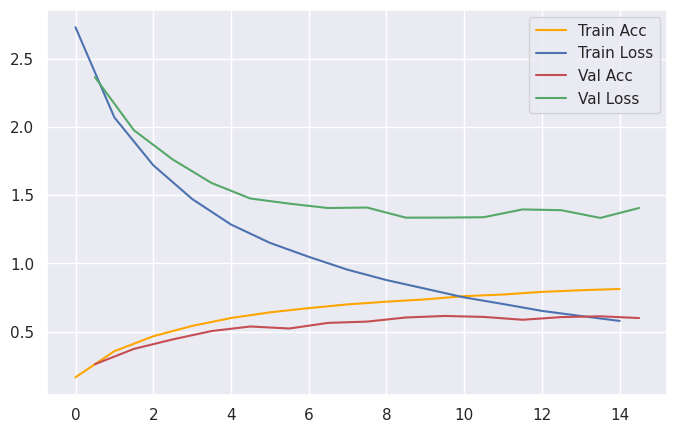

Best validation accuracy: 0.614
Loss against test set: 1.3485567569732666
Accuracy against test set: 0.6103585362434387
157/157 [==============================] - 0s 2ms/step


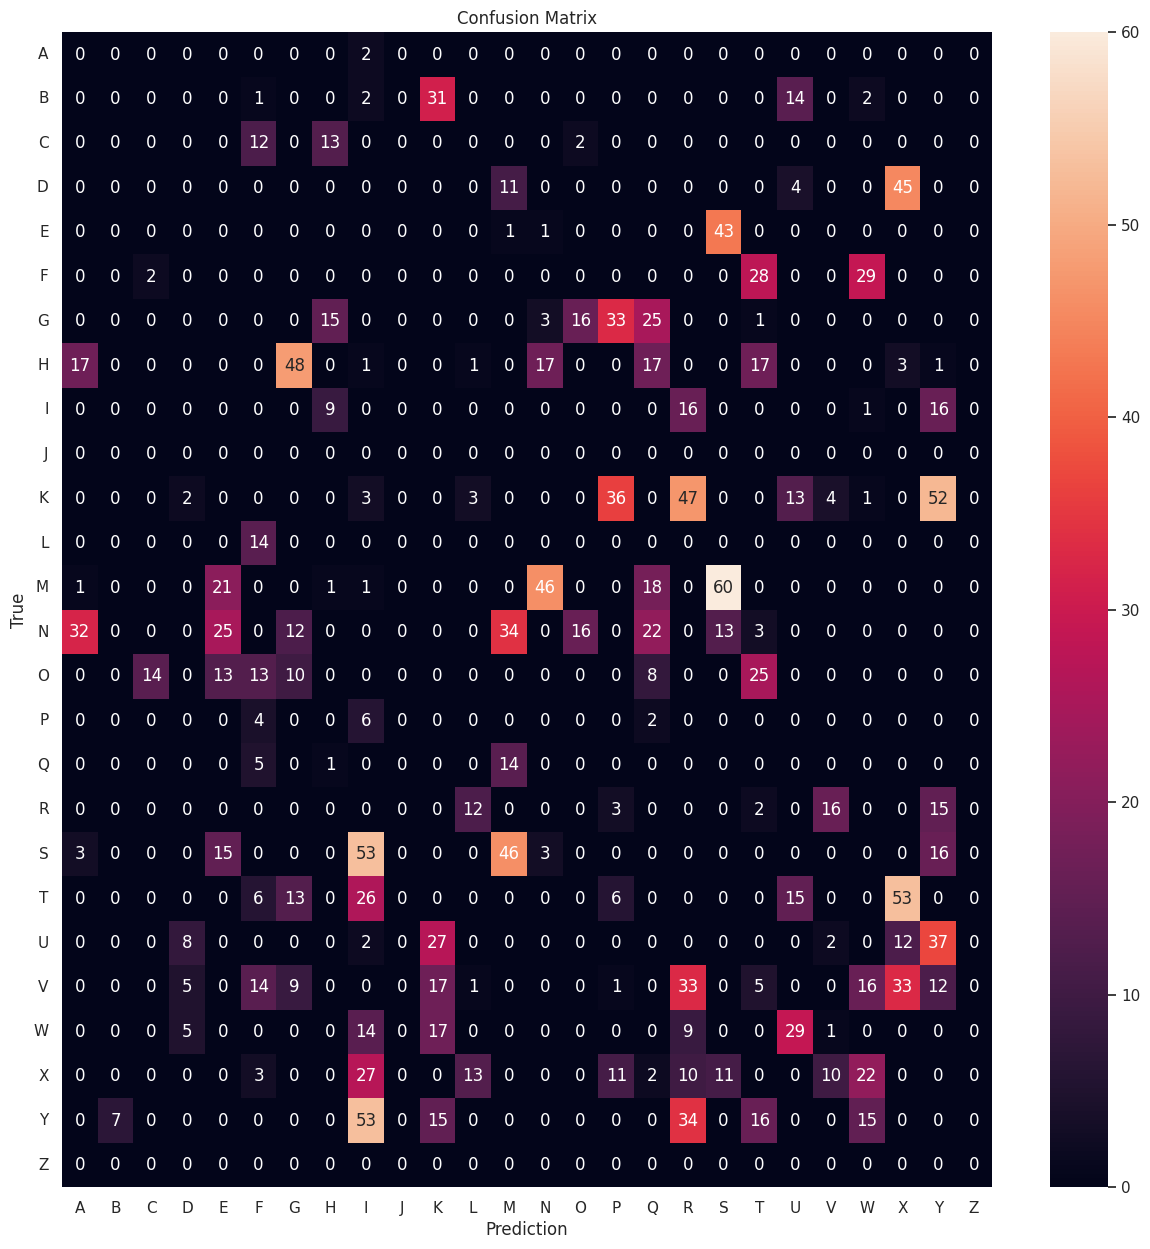

0.6143122911453247

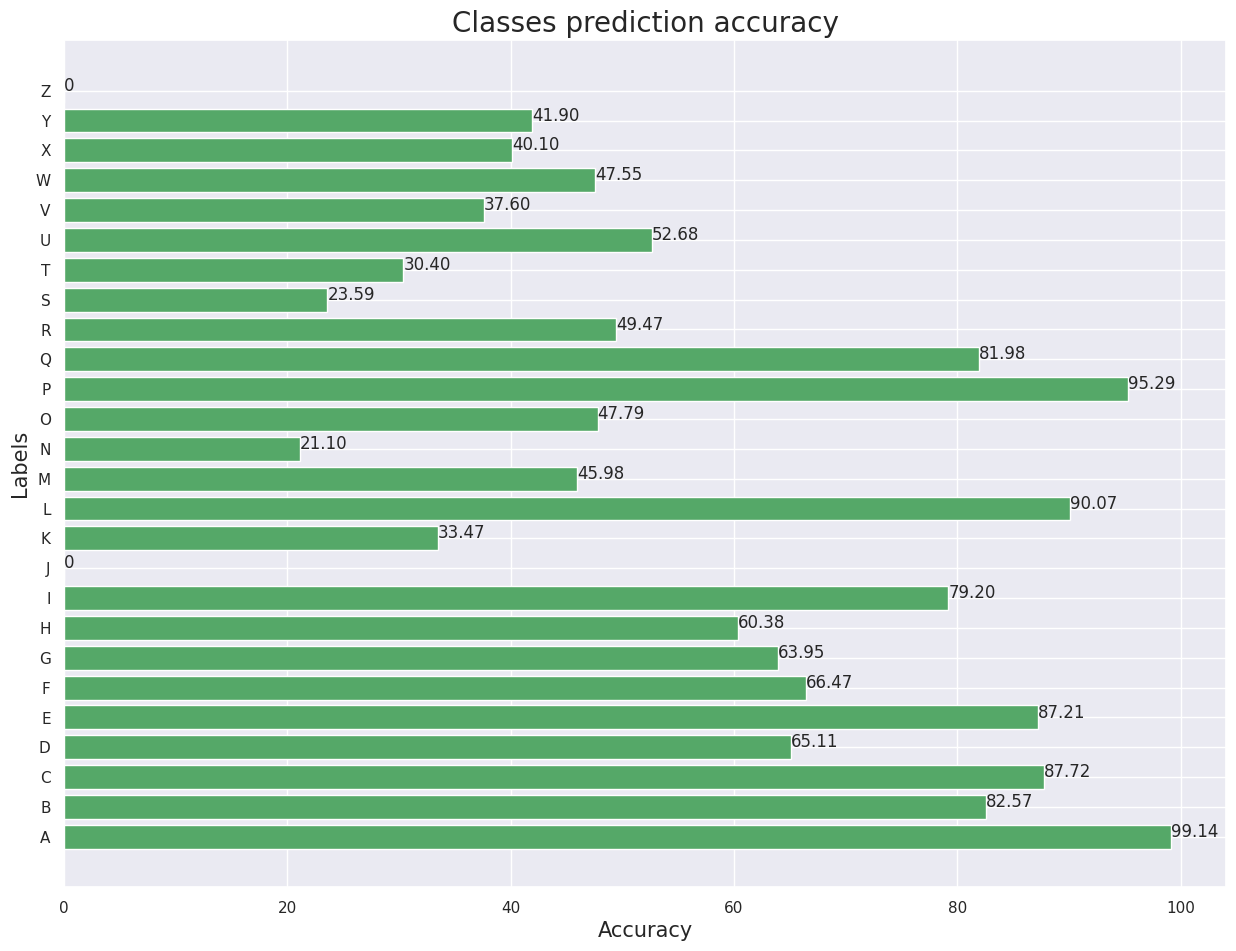

In [76]:
execute(dense_model, n_epochs, batch_size,learn_rate)

### Initial Densely connected model evaluation

The initial cnn model gives the following scoring:

* Best validation accuracy: 0.614

* Loss against test set: 1.349

* Overall accuracy against test set: 0.61

Classification

* Best correctly classified letter/s: A and P (above 90%)

* Least correctly classified letter/s : S and N (less than 25%)

* Most commonly misclassified letter/s:
  * M classified as S (60 misclassifications)
  * Y classified as I (53 misclassifications)
  * S classified as I (53 misclassifications)
  * T classified as X (53 misclassifications)
  * K classified as Y (52 misclassifications)

In [140]:
# to check the model performance using accuracy
def execute_layers(model, n_epochs, batch_size,learn_rate,callback=None,summary=False):
    if callback !=None:
        callbacks=callback
    else:
        callbacks = early_stopping_cb

    max_val_acc, testres, history, model=fit_evaluate(model, n_epochs, batch_size, callbacks)

    # history = model.fit(X_train,y_train, epochs=n_epochs,
    # callbacks=callbacks,validation_data=(X_valid,y_valid))

    if summary:
        model.summary()

    ## plotting loss curve
    plot_history(history)
    return max_val_acc

## Optimizing Learning Rate

### CNN

Epoch 1/25
832/832 [==============================] - 33s 39ms/step - loss: 6737.3584 - accuracy: 0.0417 - val_loss: 45.0768 - val_accuracy: 0.0678
Epoch 2/25
832/832 [==============================] - 30s 36ms/step - loss: 24.0761 - accuracy: 0.0435 - val_loss: 26.6542 - val_accuracy: 0.0428
Epoch 3/25
832/832 [==============================] - 30s 36ms/step - loss: 25.9510 - accuracy: 0.0418 - val_loss: 20.0750 - val_accuracy: 0.0400
Epoch 4/25
832/832 [==============================] - 30s 36ms/step - loss: 36.9212 - accuracy: 0.0441 - val_loss: 43.7155 - val_accuracy: 0.0428
Epoch 5/25
832/832 [==============================] - 31s 37ms/step - loss: 59.6685 - accuracy: 0.0425 - val_loss: 79.1062 - val_accuracy: 0.0678
Epoch 6/25
832/832 [==============================] - 36s 44ms/step - loss: 93.2684 - accuracy: 0.0419 - val_loss: 131.0262 - val_accuracy: 0.0558


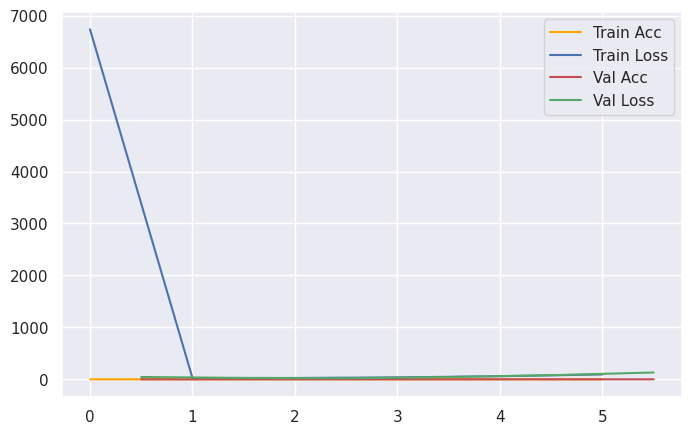

Epoch 1/25
832/832 [==============================] - 46s 53ms/step - loss: 14.0682 - accuracy: 0.0404 - val_loss: 6.8785 - val_accuracy: 0.0595
Epoch 2/25
832/832 [==============================] - 33s 39ms/step - loss: 5.3407 - accuracy: 0.0899 - val_loss: 4.5130 - val_accuracy: 0.1687
Epoch 3/25
832/832 [==============================] - 30s 37ms/step - loss: 4.2858 - accuracy: 0.3249 - val_loss: 6.4549 - val_accuracy: 0.3327
Epoch 4/25
832/832 [==============================] - 32s 39ms/step - loss: 4.0137 - accuracy: 0.6385 - val_loss: 8.2425 - val_accuracy: 0.6603
Epoch 5/25
832/832 [==============================] - 31s 38ms/step - loss: 3.4011 - accuracy: 0.8068 - val_loss: 8.5769 - val_accuracy: 0.7779
Epoch 6/25
832/832 [==============================] - 31s 37ms/step - loss: 2.8886 - accuracy: 0.9016 - val_loss: 17.9789 - val_accuracy: 0.7639
Epoch 7/25
832/832 [==============================] - 31s 38ms/step - loss: 2.2071 - accuracy: 0.9474 - val_loss: 22.7569 - val_accura

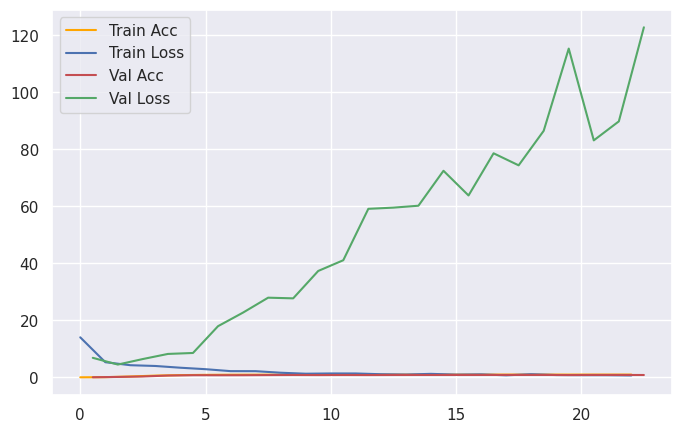

Epoch 1/25
832/832 [==============================] - 32s 37ms/step - loss: 0.5730 - accuracy: 0.8322 - val_loss: 0.4561 - val_accuracy: 0.8824
Epoch 2/25
832/832 [==============================] - 31s 37ms/step - loss: 0.0106 - accuracy: 0.9982 - val_loss: 0.4626 - val_accuracy: 0.9038
Epoch 3/25
832/832 [==============================] - 31s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5600 - val_accuracy: 0.9061
Epoch 4/25
832/832 [==============================] - 31s 37ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.5493 - val_accuracy: 0.9094
Epoch 5/25
832/832 [==============================] - 31s 37ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.5649 - val_accuracy: 0.9061
Epoch 6/25
832/832 [==============================] - 31s 37ms/step - loss: 7.3413e-05 - accuracy: 1.0000 - val_loss: 0.5825 - val_accuracy: 0.9126
Epoch 7/25
832/832 [==============================] - 31s 37ms/step - loss: 3.6639e-05 - accuracy: 1.0000 - val_loss: 0.6202 - val_a

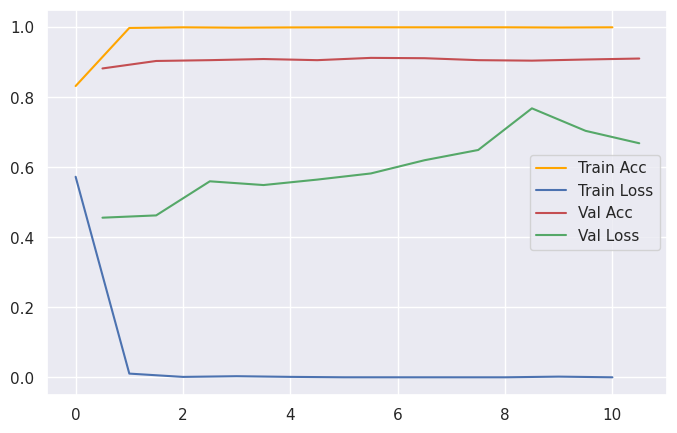

Epoch 1/25
832/832 [==============================] - 32s 37ms/step - loss: 1.6272 - accuracy: 0.5317 - val_loss: 1.0943 - val_accuracy: 0.6468
Epoch 2/25
832/832 [==============================] - 31s 37ms/step - loss: 0.6134 - accuracy: 0.8119 - val_loss: 0.7807 - val_accuracy: 0.7528
Epoch 3/25
832/832 [==============================] - 31s 37ms/step - loss: 0.3382 - accuracy: 0.8960 - val_loss: 0.6016 - val_accuracy: 0.8169
Epoch 4/25
832/832 [==============================] - 32s 38ms/step - loss: 0.1853 - accuracy: 0.9457 - val_loss: 0.5080 - val_accuracy: 0.8499
Epoch 5/25
832/832 [==============================] - 32s 38ms/step - loss: 0.0995 - accuracy: 0.9760 - val_loss: 0.4873 - val_accuracy: 0.8573
Epoch 6/25
832/832 [==============================] - 34s 41ms/step - loss: 0.0491 - accuracy: 0.9921 - val_loss: 0.5374 - val_accuracy: 0.8634
Epoch 7/25
832/832 [==============================] - 32s 39ms/step - loss: 0.0266 - accuracy: 0.9971 - val_loss: 0.5213 - val_accuracy:

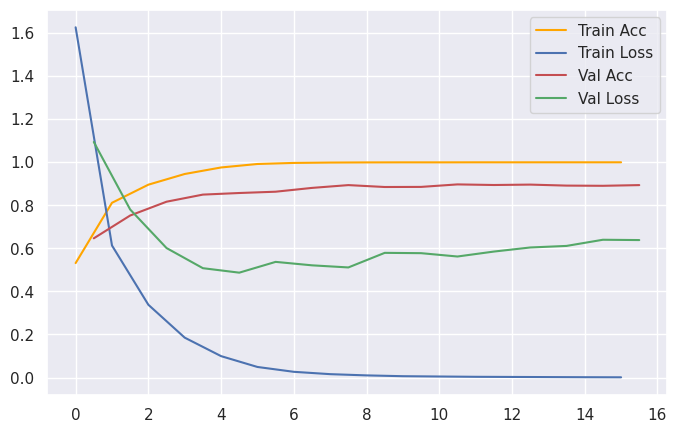

Epoch 1/25
832/832 [==============================] - 35s 40ms/step - loss: 3.1409 - accuracy: 0.1046 - val_loss: 3.1000 - val_accuracy: 0.1710
Epoch 2/25
832/832 [==============================] - 33s 39ms/step - loss: 2.9162 - accuracy: 0.2841 - val_loss: 2.7340 - val_accuracy: 0.3123
Epoch 3/25
832/832 [==============================] - 36s 43ms/step - loss: 2.3700 - accuracy: 0.4200 - val_loss: 2.1659 - val_accuracy: 0.3996
Epoch 4/25
832/832 [==============================] - 33s 40ms/step - loss: 1.8516 - accuracy: 0.5097 - val_loss: 1.7990 - val_accuracy: 0.5093
Epoch 5/25
832/832 [==============================] - 32s 38ms/step - loss: 1.5334 - accuracy: 0.5763 - val_loss: 1.5571 - val_accuracy: 0.5627
Epoch 6/25
832/832 [==============================] - 33s 39ms/step - loss: 1.3170 - accuracy: 0.6287 - val_loss: 1.3907 - val_accuracy: 0.6078
Epoch 7/25
832/832 [==============================] - 46s 55ms/step - loss: 1.1538 - accuracy: 0.6713 - val_loss: 1.2468 - val_accuracy:

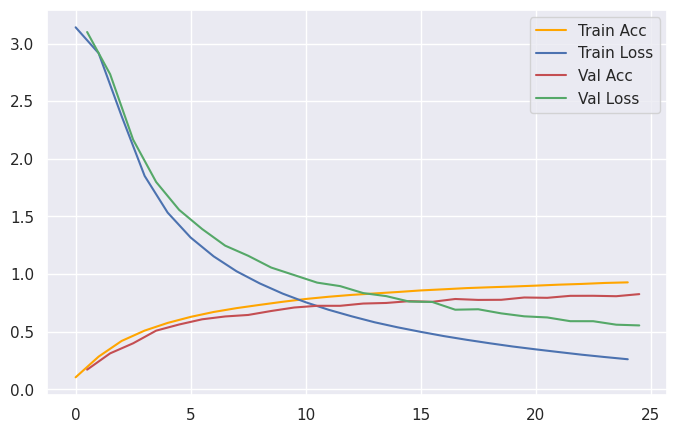

[[0.1, 0.06784386932849884], [0.010000000000000002, 0.8740706443786621], [0.001, 0.9126393795013428], [0.0001, 0.8973048329353333], [1e-05, 0.8262081742286682]]
--------------------------------------


Text(0, 0.5, 'Val Accuracy')

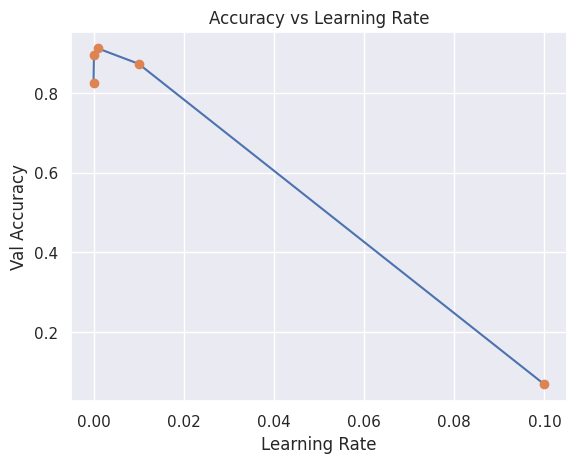

In [78]:

res=[]
learningrate=0.1
for lr in [1,0.1, 0.01,0.001,0.0001]:
    # valacc, history, discard = do_all(hidden_sizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    # plot_history(history)
    model = model_cnn_factory(hidden_sizes,actfn,optimiser,lr)
    valacc=execute_layers(model, n_epochs, batch_size,lr)
    res += [[lr*learningrate,valacc]]
print(res)
print("--------------------------------------")
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

### Learning rate performance for CNN

| Learning rate | Accuracy | Epoch achieved |
|---------------|----------|----------------|
| 1 | 0.0678 | 6 |
| 0.1 | 0.874 | 23 |
| 0.01 | 0.9126 | 11 |
| 0.001 | 0.8973 | 16 |
| 0.0001 | 0.826 | 25 |

### Discussion

Based on the learning rate performance it can be said that learning rate of **0.01** performed better than the others running at a total of **11 epochs** for **CNN** with **3 hidden layers**

### Densely  Connected

Epoch 1/25
832/832 [==============================] - 4s 4ms/step - loss: 240.4021 - accuracy: 0.0420 - val_loss: 3.3242 - val_accuracy: 0.0404
Epoch 2/25
832/832 [==============================] - 3s 3ms/step - loss: 3.3370 - accuracy: 0.0405 - val_loss: 3.3012 - val_accuracy: 0.0520
Epoch 3/25
832/832 [==============================] - 3s 4ms/step - loss: 3.3459 - accuracy: 0.0440 - val_loss: 3.4527 - val_accuracy: 0.0358
Epoch 4/25
832/832 [==============================] - 2s 2ms/step - loss: 3.3621 - accuracy: 0.0426 - val_loss: 3.3612 - val_accuracy: 0.0404
Epoch 5/25
832/832 [==============================] - 3s 3ms/step - loss: 3.3908 - accuracy: 0.0427 - val_loss: 3.3462 - val_accuracy: 0.0316
Epoch 6/25
832/832 [==============================] - 3s 4ms/step - loss: 3.4202 - accuracy: 0.0428 - val_loss: 3.5560 - val_accuracy: 0.0372
Epoch 7/25
832/832 [==============================] - 2s 2ms/step - loss: 3.4412 - accuracy: 0.0412 - val_loss: 3.4488 - val_accuracy: 0.0423


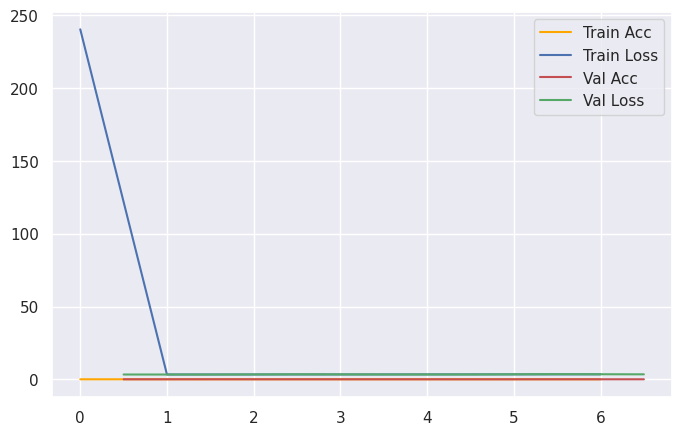

Epoch 1/25
832/832 [==============================] - 3s 3ms/step - loss: 3.2981 - accuracy: 0.0428 - val_loss: 3.2481 - val_accuracy: 0.0372
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 3.2561 - accuracy: 0.0425 - val_loss: 3.2887 - val_accuracy: 0.0423
Epoch 3/25
832/832 [==============================] - 3s 4ms/step - loss: 3.2745 - accuracy: 0.0416 - val_loss: 3.2805 - val_accuracy: 0.0520
Epoch 4/25
832/832 [==============================] - 3s 3ms/step - loss: 3.2797 - accuracy: 0.0449 - val_loss: 3.3214 - val_accuracy: 0.0316
Epoch 5/25
832/832 [==============================] - 2s 3ms/step - loss: 3.2824 - accuracy: 0.0441 - val_loss: 3.3410 - val_accuracy: 0.0316
Epoch 6/25
832/832 [==============================] - 2s 3ms/step - loss: 3.2840 - accuracy: 0.0421 - val_loss: 3.2809 - val_accuracy: 0.0414
Epoch 7/25
832/832 [==============================] - 2s 3ms/step - loss: 3.2840 - accuracy: 0.0409 - val_loss: 3.4152 - val_accuracy: 0.0228
Epoch 

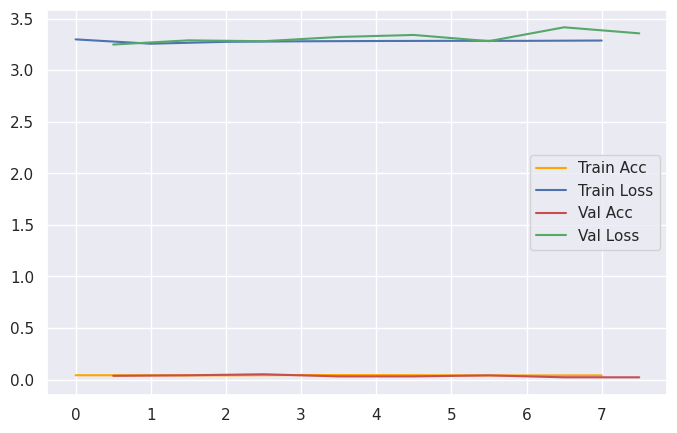

Epoch 1/25
832/832 [==============================] - 3s 3ms/step - loss: 2.2022 - accuracy: 0.2775 - val_loss: 1.8303 - val_accuracy: 0.3606
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 1.5805 - accuracy: 0.4497 - val_loss: 1.7881 - val_accuracy: 0.4001
Epoch 3/25
832/832 [==============================] - 2s 3ms/step - loss: 1.2865 - accuracy: 0.5480 - val_loss: 1.7338 - val_accuracy: 0.4433
Epoch 4/25
832/832 [==============================] - 5s 6ms/step - loss: 1.0814 - accuracy: 0.6185 - val_loss: 1.7710 - val_accuracy: 0.4596
Epoch 5/25
832/832 [==============================] - 4s 5ms/step - loss: 0.9039 - accuracy: 0.6762 - val_loss: 1.5048 - val_accuracy: 0.5493
Epoch 6/25
832/832 [==============================] - 2s 3ms/step - loss: 0.7587 - accuracy: 0.7248 - val_loss: 1.4359 - val_accuracy: 0.5976
Epoch 7/25
832/832 [==============================] - 2s 3ms/step - loss: 0.6454 - accuracy: 0.7667 - val_loss: 1.6533 - val_accuracy: 0.5911
Epoch 

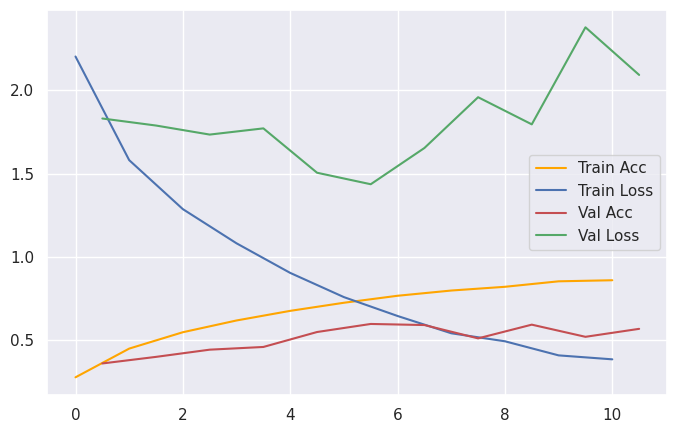

Epoch 1/25
832/832 [==============================] - 6s 6ms/step - loss: 2.7785 - accuracy: 0.1798 - val_loss: 2.3229 - val_accuracy: 0.2746
Epoch 2/25
832/832 [==============================] - 3s 4ms/step - loss: 1.9903 - accuracy: 0.3900 - val_loss: 1.9784 - val_accuracy: 0.3643
Epoch 3/25
832/832 [==============================] - 4s 5ms/step - loss: 1.6485 - accuracy: 0.4835 - val_loss: 1.7124 - val_accuracy: 0.4614
Epoch 4/25
832/832 [==============================] - 3s 3ms/step - loss: 1.4380 - accuracy: 0.5461 - val_loss: 1.5715 - val_accuracy: 0.5028
Epoch 5/25
832/832 [==============================] - 4s 5ms/step - loss: 1.2772 - accuracy: 0.5858 - val_loss: 1.5016 - val_accuracy: 0.5005
Epoch 6/25
832/832 [==============================] - 5s 6ms/step - loss: 1.1516 - accuracy: 0.6240 - val_loss: 1.3888 - val_accuracy: 0.5479
Epoch 7/25
832/832 [==============================] - 4s 5ms/step - loss: 1.0491 - accuracy: 0.6549 - val_loss: 1.4257 - val_accuracy: 0.5646
Epoch 

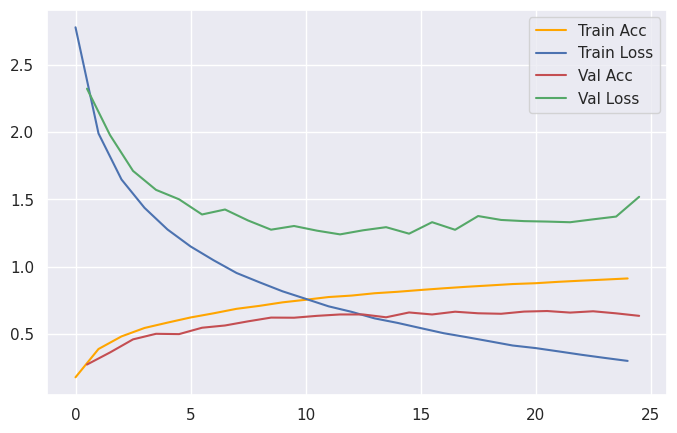

Epoch 1/25
832/832 [==============================] - 7s 7ms/step - loss: 3.1704 - accuracy: 0.0486 - val_loss: 3.1683 - val_accuracy: 0.0283
Epoch 2/25
832/832 [==============================] - 3s 3ms/step - loss: 3.0907 - accuracy: 0.0626 - val_loss: 3.0993 - val_accuracy: 0.0479
Epoch 3/25
832/832 [==============================] - 2s 3ms/step - loss: 2.9984 - accuracy: 0.0955 - val_loss: 3.0108 - val_accuracy: 0.1097
Epoch 4/25
832/832 [==============================] - 2s 3ms/step - loss: 2.8831 - accuracy: 0.1501 - val_loss: 2.8842 - val_accuracy: 0.1362
Epoch 5/25
832/832 [==============================] - 2s 3ms/step - loss: 2.7486 - accuracy: 0.2005 - val_loss: 2.7353 - val_accuracy: 0.1691
Epoch 6/25
832/832 [==============================] - 4s 4ms/step - loss: 2.6079 - accuracy: 0.2419 - val_loss: 2.5846 - val_accuracy: 0.2007
Epoch 7/25
832/832 [==============================] - 3s 3ms/step - loss: 2.4762 - accuracy: 0.2699 - val_loss: 2.4667 - val_accuracy: 0.2328
Epoch 

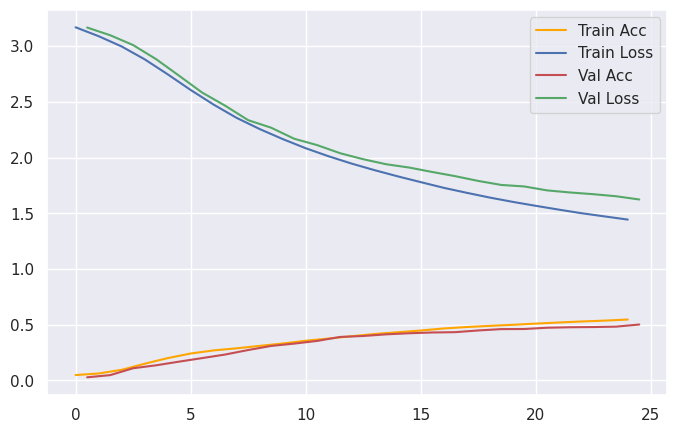

[[0.1, 0.05204461142420769], [0.010000000000000002, 0.05204461142420769], [0.001, 0.5975836515426636], [0.0001, 0.671933114528656], [1e-05, 0.5023234486579895]]
--------------------------------------


Text(0, 0.5, 'Val Accuracy')

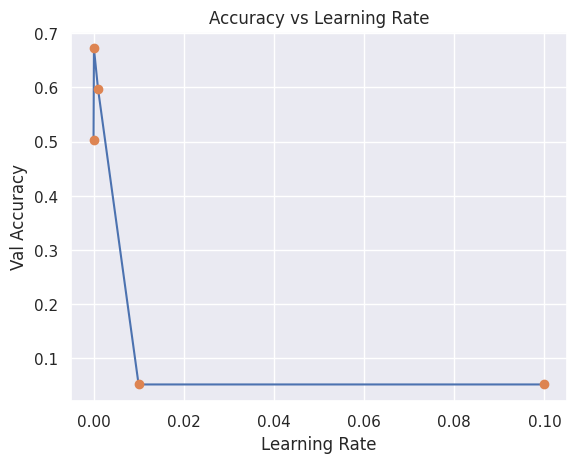

In [86]:
res_dense=[]
learningrate=0.1
for lr in [1,0.1, 0.01,0.001,0.0001]:
    # valacc, history, discard = do_all(hidden_sizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    # plot_history(history)
    model = model_dense_factory(hidden_sizes,actfn,optimiser,lr)
    valacc=execute_layers(model, n_epochs, batch_size,lr)
    res_dense += [[lr*learningrate,valacc]]
print(res_dense)
print("--------------------------------------")
res_dense=np.array(res_dense)
plt.plot(res_dense[:,0],res_dense[:,1])
plt.plot(res_dense[:,0],res_dense[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

### Learning rate performance for Densely connected

| Learning rate | Accuracy | Epoch achieved |
|---------------|----------|----------------|
| 1 | 0.052 | 7 |
| 0.1 | 0.052 | 8 |
| 0.01 | 0.598 | 11 |
| 0.001 | 0.672 | 25 |
| 0.0001 | 0.502 | 25 |


### Discussion

Based on the learning rate performance it can be said that learning rate of **0.001** performed better than the others running at a total of **25 epochs** for **Densely connected** with **3 hidden layers**

## Optimzing number of layers


### CNN

Epoch 1/11
832/832 [==============================] - 59s 70ms/step - loss: 0.4432 - accuracy: 0.8710 - val_loss: 0.3955 - val_accuracy: 0.8992
Epoch 2/11
832/832 [==============================] - 34s 40ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.4931 - val_accuracy: 0.9043
Epoch 3/11
832/832 [==============================] - 36s 44ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.4617 - val_accuracy: 0.9108
Epoch 4/11
832/832 [==============================] - 35s 42ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.4927 - val_accuracy: 0.9029
Epoch 5/11
832/832 [==============================] - 35s 43ms/step - loss: 8.3297e-05 - accuracy: 1.0000 - val_loss: 0.5064 - val_accuracy: 0.9154
Epoch 6/11
832/832 [==============================] - 34s 41ms/step - loss: 3.7559e-05 - accuracy: 1.0000 - val_loss: 0.5091 - val_accuracy: 0.9201
Epoch 7/11
832/832 [==============================] - 36s 43ms/step - loss: 1.9296e-05 - accuracy: 1.0000 - val_loss: 0.5416 - v

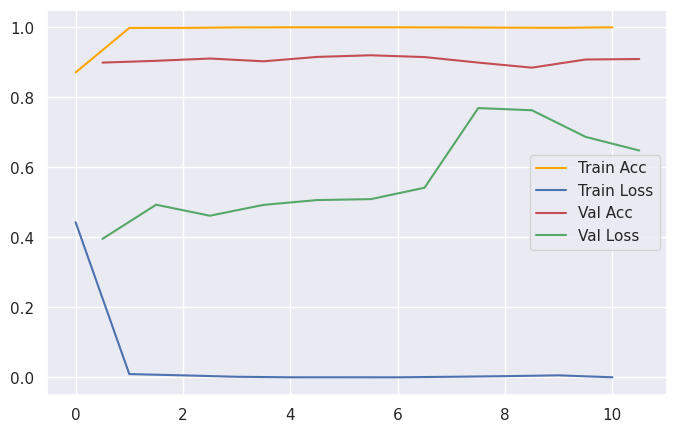

Epoch 1/11
832/832 [==============================] - 32s 37ms/step - loss: 0.5670 - accuracy: 0.8335 - val_loss: 0.4044 - val_accuracy: 0.8941
Epoch 2/11
832/832 [==============================] - 31s 37ms/step - loss: 0.0123 - accuracy: 0.9974 - val_loss: 0.4367 - val_accuracy: 0.9038
Epoch 3/11
832/832 [==============================] - 30s 36ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.4775 - val_accuracy: 0.8857
Epoch 4/11
832/832 [==============================] - 29s 35ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.4122 - val_accuracy: 0.9266
Epoch 5/11
832/832 [==============================] - 31s 37ms/step - loss: 1.6570e-04 - accuracy: 1.0000 - val_loss: 0.4537 - val_accuracy: 0.9154
Epoch 6/11
832/832 [==============================] - 31s 37ms/step - loss: 1.1937e-04 - accuracy: 1.0000 - val_loss: 0.4679 - val_accuracy: 0.9233
Epoch 7/11
832/832 [==============================] - 30s 36ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.5195 - val_a

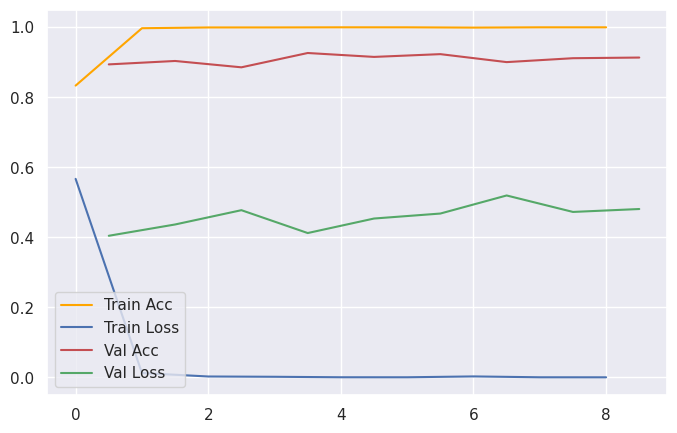

Epoch 1/11
832/832 [==============================] - 36s 42ms/step - loss: 0.4132 - accuracy: 0.8748 - val_loss: 0.2594 - val_accuracy: 0.9247
Epoch 2/11
832/832 [==============================] - 36s 43ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.3128 - val_accuracy: 0.9154
Epoch 3/11
832/832 [==============================] - 34s 41ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.2659 - val_accuracy: 0.9493
Epoch 4/11
832/832 [==============================] - 36s 43ms/step - loss: 1.1915e-04 - accuracy: 1.0000 - val_loss: 0.2934 - val_accuracy: 0.9410
Epoch 5/11
832/832 [==============================] - 34s 41ms/step - loss: 4.4751e-05 - accuracy: 1.0000 - val_loss: 0.2927 - val_accuracy: 0.9456
Epoch 6/11
832/832 [==============================] - 38s 46ms/step - loss: 2.0153e-05 - accuracy: 1.0000 - val_loss: 0.3228 - val_accuracy: 0.9438
Epoch 7/11
832/832 [==============================] - 35s 42ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.3192 - v

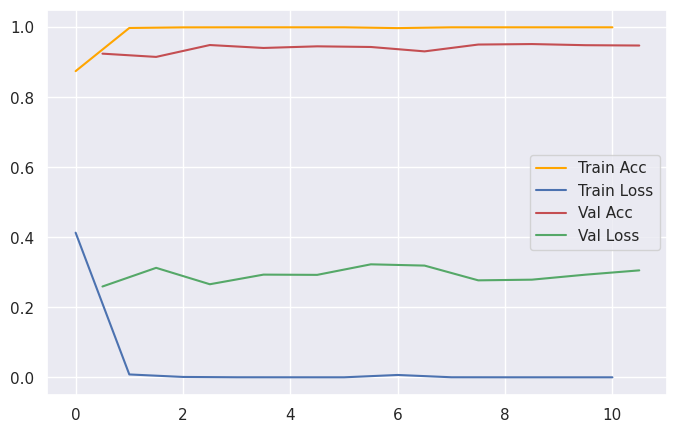

[[[16, 32, 64], 0.9200743436813354], [[16, 32, 16], 0.9265799522399902], [[16, 32, 64, 16], 0.9521375298500061]]
----------------------------------------


<ipython-input-84-590dcbc1e298>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res=np.array(res)


Text(0, 0.5, 'Val Accuracy')

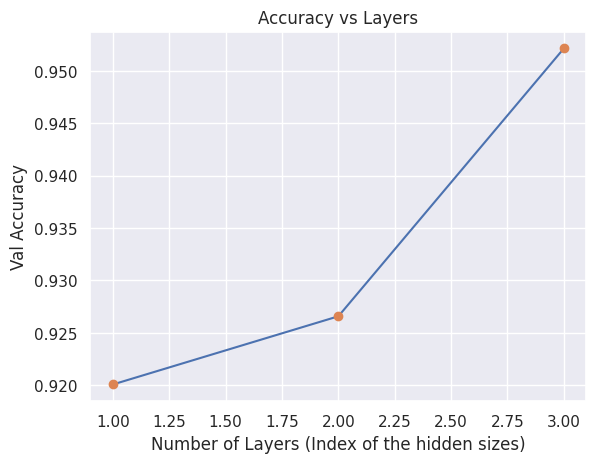

In [84]:
res=[]

# updating new values
epoch_new= 11
new_lr=0.01
hiddensizes=[[16,32,64],[16,32,16],[16,32,64,16]]

for hiddensize in hiddensizes:
    # valacc, history, discard = execute_dense(hidden_sizes[:n], actfn, optimiser, learn_rate, n_epochs, batch_size)
    # plot_history(history)

    model = model_cnn_factory(hiddensize,actfn,optimiser,new_lr)
    valacc=execute_layers(model, epoch_new, batch_size,new_lr)
    res += [[hiddensize,valacc]]
print(res)
print("----------------------------------------")
res=np.array(res)
plt.plot([1,2,3],res[:,1])
plt.plot([1,2,3],res[:,1],'o')
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers (Index of the hidden sizes)')
plt.ylabel('Val Accuracy')

### Layer optimization performance for CNN

| Layer sizes | Accuracy |
|-------------|----------|
| [16, 32, 64] | 0.92 |
| [16, 32, 16] | 0.927 |
| [16, 32, 64, 16] | 0.952 |

### Discussion

For the **CNN** model with learning rate of 0.01 and max epoch of 11 the number of layers that performed best were **4** with filters **[16,32,64,16]**, therefore these will be the layers chosen hereforth.

### Densely Connected

Epoch 1/25
832/832 [==============================] - 3s 3ms/step - loss: 2.5451 - accuracy: 0.2345 - val_loss: 2.0670 - val_accuracy: 0.3318
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 1.7349 - accuracy: 0.4454 - val_loss: 1.7220 - val_accuracy: 0.4493
Epoch 3/25
832/832 [==============================] - 3s 4ms/step - loss: 1.4452 - accuracy: 0.5255 - val_loss: 1.5012 - val_accuracy: 0.5200
Epoch 4/25
832/832 [==============================] - 3s 4ms/step - loss: 1.2266 - accuracy: 0.5964 - val_loss: 1.3873 - val_accuracy: 0.5455
Epoch 5/25
832/832 [==============================] - 2s 3ms/step - loss: 1.0640 - accuracy: 0.6443 - val_loss: 1.3424 - val_accuracy: 0.5962
Epoch 6/25
832/832 [==============================] - 2s 2ms/step - loss: 0.9449 - accuracy: 0.6879 - val_loss: 1.3074 - val_accuracy: 0.5860
Epoch 7/25
832/832 [==============================] - 2s 2ms/step - loss: 0.8430 - accuracy: 0.7225 - val_loss: 1.4345 - val_accuracy: 0.5553
Epoch 

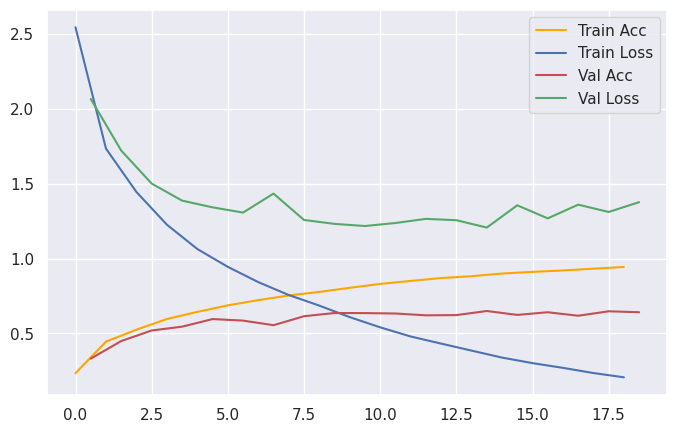

Epoch 1/25
832/832 [==============================] - 4s 4ms/step - loss: 2.7625 - accuracy: 0.1749 - val_loss: 2.3531 - val_accuracy: 0.2876
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 2.0039 - accuracy: 0.3761 - val_loss: 1.9676 - val_accuracy: 0.3787
Epoch 3/25
832/832 [==============================] - 2s 3ms/step - loss: 1.6291 - accuracy: 0.4789 - val_loss: 1.7423 - val_accuracy: 0.4340
Epoch 4/25
832/832 [==============================] - 2s 3ms/step - loss: 1.4133 - accuracy: 0.5409 - val_loss: 1.6181 - val_accuracy: 0.4596
Epoch 5/25
832/832 [==============================] - 2s 3ms/step - loss: 1.2635 - accuracy: 0.5823 - val_loss: 1.5404 - val_accuracy: 0.5056
Epoch 6/25
832/832 [==============================] - 3s 3ms/step - loss: 1.1506 - accuracy: 0.6143 - val_loss: 1.5557 - val_accuracy: 0.5084
Epoch 7/25
832/832 [==============================] - 3s 4ms/step - loss: 1.0537 - accuracy: 0.6468 - val_loss: 1.4466 - val_accuracy: 0.5395
Epoch 

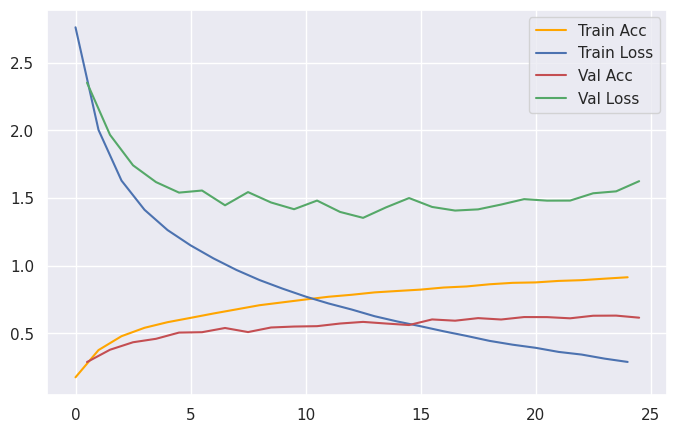

Epoch 1/25
832/832 [==============================] - 5s 5ms/step - loss: 2.7269 - accuracy: 0.1785 - val_loss: 2.2890 - val_accuracy: 0.2323
Epoch 2/25
832/832 [==============================] - 3s 3ms/step - loss: 1.9304 - accuracy: 0.3774 - val_loss: 1.8929 - val_accuracy: 0.3973
Epoch 3/25
832/832 [==============================] - 2s 3ms/step - loss: 1.6092 - accuracy: 0.4815 - val_loss: 1.7592 - val_accuracy: 0.4233
Epoch 4/25
832/832 [==============================] - 2s 3ms/step - loss: 1.4181 - accuracy: 0.5406 - val_loss: 1.6688 - val_accuracy: 0.4898
Epoch 5/25
832/832 [==============================] - 2s 3ms/step - loss: 1.2730 - accuracy: 0.5843 - val_loss: 1.5946 - val_accuracy: 0.5005
Epoch 6/25
832/832 [==============================] - 3s 3ms/step - loss: 1.1437 - accuracy: 0.6174 - val_loss: 1.6213 - val_accuracy: 0.5084
Epoch 7/25
832/832 [==============================] - 3s 4ms/step - loss: 1.0426 - accuracy: 0.6488 - val_loss: 1.5501 - val_accuracy: 0.5218
Epoch 

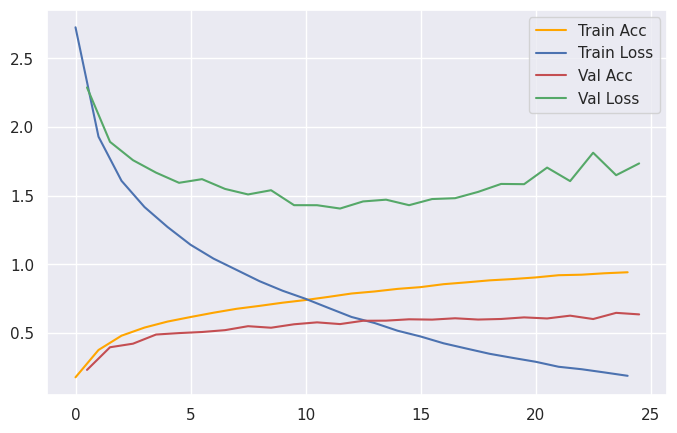

[[[16, 32, 64], 0.6500929594039917], [[16, 32, 16], 0.6310408711433411], [[16, 32, 64, 16], 0.6477695107460022]]
----------------------------------------


<ipython-input-89-10cda2eeae5c>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res_dense=np.array(res_dense)


Text(0, 0.5, 'Val Accuracy')

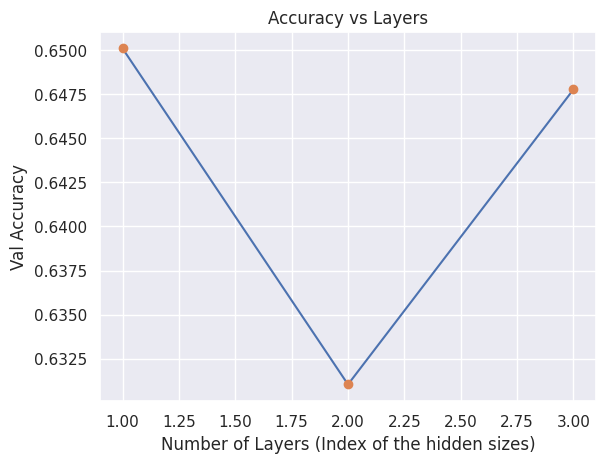

In [89]:
res_dense=[]

# updating new values
epoch_new_dense= 25
new_lr_dense=0.001
hiddensizes=[[16,32,64],[16,32,16],[16,32,64,16]]

for hiddensize in hiddensizes:
    # valacc, history, discard = execute_dense(hidden_sizes[:n], actfn, optimiser, learn_rate, n_epochs, batch_size)
    # plot_history(history)

    model = model_dense_factory(hiddensize,actfn,optimiser,new_lr_dense)
    valacc=execute_layers(model, epoch_new_dense, batch_size,new_lr_dense)
    res_dense += [[hiddensize,valacc]]
print(res_dense)
print("----------------------------------------")
res_dense=np.array(res_dense)
plt.plot([1,2,3],res_dense[:,1])
plt.plot([1,2,3],res_dense[:,1],'o')
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers (Index of the hidden sizes)')
plt.ylabel('Val Accuracy')

### Layer optimization performance for Densely connected

| Layer sizes | Accuracy |
|-------------|----------|
| [16, 32, 64] | 0.65 |
| [16, 32, 16] | 0.631 |
| [16, 32, 64, 16] | 0.648 |

### Discussion

For the **Densely connected** with learning rate of **0.001** and epoch of **25** the number of layers that performed best were **3** with filters **[16,32,64]**, therefore these will be the layers chosen hereforth.

## Optimizing the optimizers

### CNN

Epoch 1/11
832/832 [==============================] - 37s 43ms/step - loss: 0.5737 - accuracy: 0.8263 - val_loss: 0.2675 - val_accuracy: 0.9233
Epoch 2/11
832/832 [==============================] - 35s 42ms/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.2244 - val_accuracy: 0.9438
Epoch 3/11
832/832 [==============================] - 36s 44ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.4068 - val_accuracy: 0.9029
Epoch 4/11
832/832 [==============================] - 36s 43ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.3297 - val_accuracy: 0.9243
Epoch 5/11
832/832 [==============================] - 55s 66ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.2308 - val_accuracy: 0.9452
Epoch 6/11
832/832 [==============================] - 56s 67ms/step - loss: 8.7383e-05 - accuracy: 1.0000 - val_loss: 0.2468 - val_accuracy: 0.9424
Epoch 7/11
832/832 [==============================] - 46s 56ms/step - loss: 2.9885e-05 - accuracy: 1.0000 - val_loss: 0.2554 - val_a

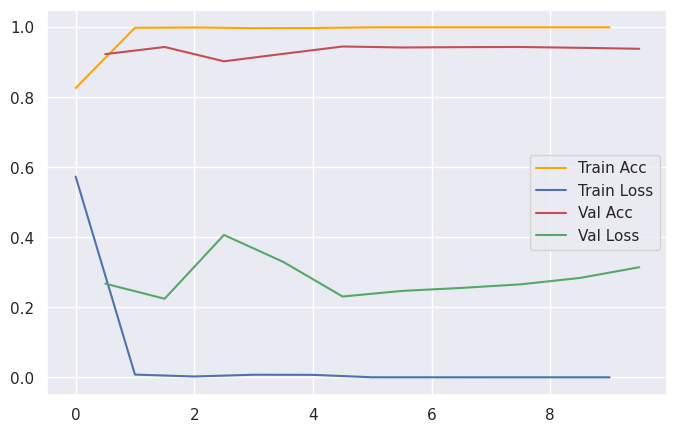

Epoch 1/11
832/832 [==============================] - 54s 62ms/step - loss: 0.4640 - accuracy: 0.8585 - val_loss: 0.3019 - val_accuracy: 0.9233
Epoch 2/11
832/832 [==============================] - 57s 69ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.3502 - val_accuracy: 0.9205
Epoch 3/11
832/832 [==============================] - 35s 42ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.4218 - val_accuracy: 0.8987
Epoch 4/11
832/832 [==============================] - 40s 48ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.2943 - val_accuracy: 0.9433
Epoch 5/11
832/832 [==============================] - 43s 51ms/step - loss: 8.4970e-05 - accuracy: 1.0000 - val_loss: 0.2961 - val_accuracy: 0.9466
Epoch 6/11
832/832 [==============================] - 44s 52ms/step - loss: 3.7967e-05 - accuracy: 1.0000 - val_loss: 0.3157 - val_accuracy: 0.9433
Epoch 7/11
832/832 [==============================] - 49s 58ms/step - loss: 1.8036e-05 - accuracy: 1.0000 - val_loss: 0.3495 - v

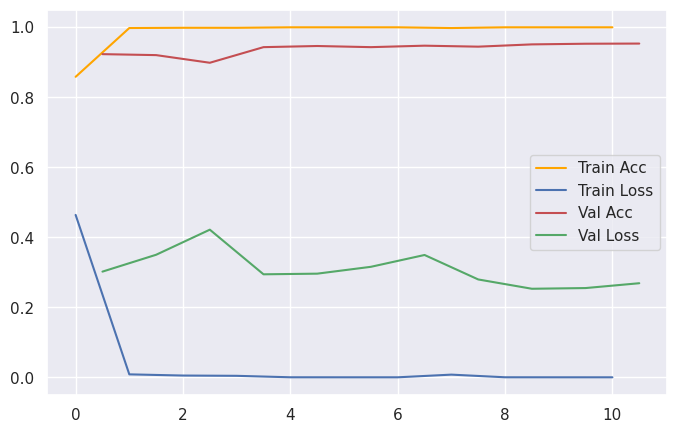

Epoch 1/11
832/832 [==============================] - 37s 43ms/step - loss: 0.5366 - accuracy: 0.8404 - val_loss: 0.3013 - val_accuracy: 0.8959
Epoch 2/11
832/832 [==============================] - 41s 49ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.3017 - val_accuracy: 0.9210
Epoch 3/11
832/832 [==============================] - 35s 42ms/step - loss: 3.1552e-04 - accuracy: 1.0000 - val_loss: 0.3500 - val_accuracy: 0.9238
Epoch 4/11
832/832 [==============================] - 36s 44ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.4075 - val_accuracy: 0.9150
Epoch 5/11
832/832 [==============================] - 37s 44ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.3082 - val_accuracy: 0.9284
Epoch 6/11
832/832 [==============================] - 37s 45ms/step - loss: 7.1874e-05 - accuracy: 1.0000 - val_loss: 0.3057 - val_accuracy: 0.9336
Epoch 7/11
832/832 [==============================] - 36s 44ms/step - loss: 3.3312e-05 - accuracy: 1.0000 - val_loss: 0.3150 - v

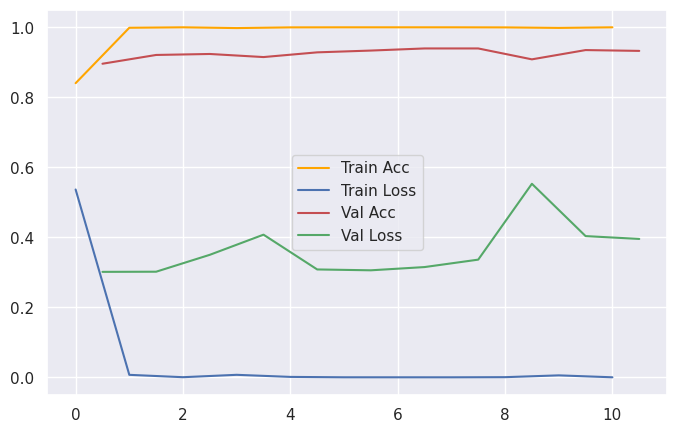

[[0.9451673030853271], [0.9535316228866577], [0.9395910501480103]]
----------------------------------------


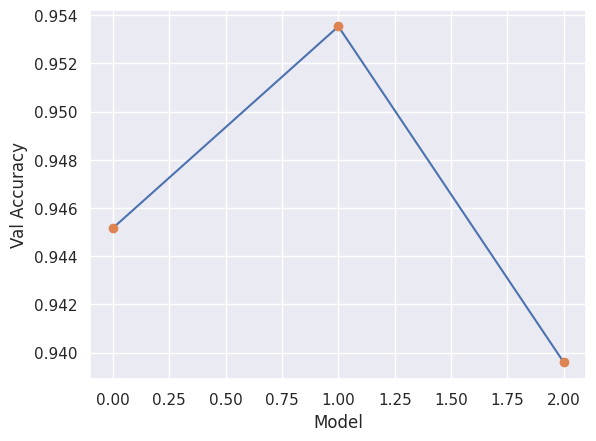

In [85]:
res=[]
# Setting new values
new_hidden=[16, 32, 64, 16]

optimizer_setup = [[keras.optimizers.SGD,new_lr], [keras.optimizers.Adamax,new_lr], [keras.optimizers.Nadam, new_lr]]
for optimizer,lr in optimizer_setup :
    # valacc, history, discard = execute_dense(hidden_sizes[:n], actfn, optimiser, learn_rate, n_epochs, batch_size)
    # plot_history(history)

    model = model_cnn_factory(new_hidden,actfn,optimiser,new_lr)
    valacc=execute_layers(model, epoch_new, batch_size,new_lr)
    res += [[valacc]]
print(res)
print("----------------------------------------")
res=np.array(res)
plt.plot(res)
plt.plot(res,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

#### Optimizer optimisation performance for CNN

| Optimizer | Accuracy |
|-----------|----------|
| SGD | 0.945 |
| Adamax | 0.954 |
| Nadam | 0.94 |

### Discussion

For the **CNN** with learning rate of **0.01** and max epoch of **11** and with filters **[16,32,64,16]** the optimizer that performed best was **Adamax**, therefore these will be the parameters chosen to build final model of CNN.

### Densely Connected

Epoch 1/25
832/832 [==============================] - 3s 3ms/step - loss: 2.4574 - accuracy: 0.2435 - val_loss: 1.9929 - val_accuracy: 0.4094
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 1.6700 - accuracy: 0.4644 - val_loss: 1.6706 - val_accuracy: 0.4586
Epoch 3/25
832/832 [==============================] - 3s 3ms/step - loss: 1.3433 - accuracy: 0.5657 - val_loss: 1.5071 - val_accuracy: 0.5088
Epoch 4/25
832/832 [==============================] - 3s 4ms/step - loss: 1.1445 - accuracy: 0.6228 - val_loss: 1.3363 - val_accuracy: 0.5730
Epoch 5/25
832/832 [==============================] - 2s 3ms/step - loss: 0.9959 - accuracy: 0.6742 - val_loss: 1.3658 - val_accuracy: 0.5599
Epoch 6/25
832/832 [==============================] - 2s 3ms/step - loss: 0.8793 - accuracy: 0.7191 - val_loss: 1.3402 - val_accuracy: 0.5841
Epoch 7/25
832/832 [==============================] - 2s 3ms/step - loss: 0.7833 - accuracy: 0.7506 - val_loss: 1.2685 - val_accuracy: 0.6008
Epoch 

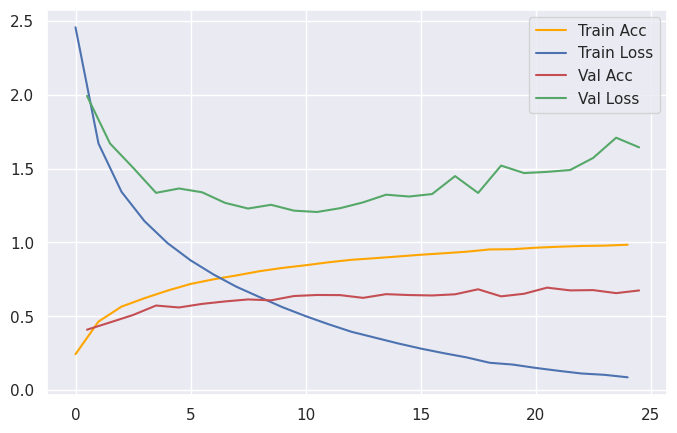

Epoch 1/25
832/832 [==============================] - 3s 3ms/step - loss: 2.5539 - accuracy: 0.2370 - val_loss: 1.9805 - val_accuracy: 0.3741
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 1.6665 - accuracy: 0.4711 - val_loss: 1.6696 - val_accuracy: 0.4856
Epoch 3/25
832/832 [==============================] - 2s 3ms/step - loss: 1.3669 - accuracy: 0.5627 - val_loss: 1.4940 - val_accuracy: 0.5502
Epoch 4/25
832/832 [==============================] - 3s 4ms/step - loss: 1.1623 - accuracy: 0.6273 - val_loss: 1.4108 - val_accuracy: 0.5497
Epoch 5/25
832/832 [==============================] - 2s 3ms/step - loss: 0.9875 - accuracy: 0.6879 - val_loss: 1.2826 - val_accuracy: 0.6087
Epoch 6/25
832/832 [==============================] - 2s 3ms/step - loss: 0.8433 - accuracy: 0.7329 - val_loss: 1.2237 - val_accuracy: 0.6022
Epoch 7/25
832/832 [==============================] - 2s 2ms/step - loss: 0.7256 - accuracy: 0.7676 - val_loss: 1.1786 - val_accuracy: 0.6166
Epoch 

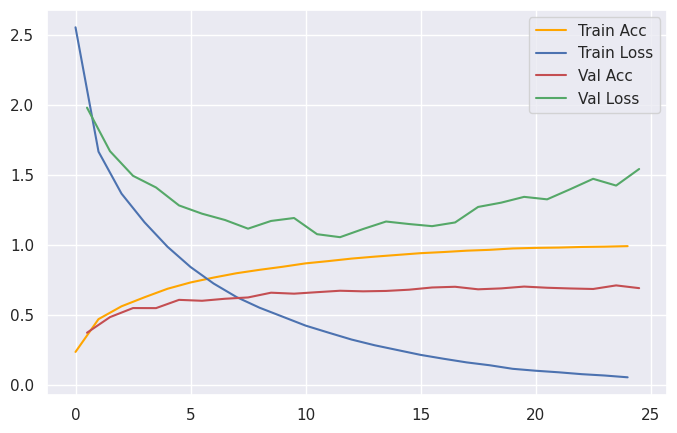

Epoch 1/25
832/832 [==============================] - 3s 3ms/step - loss: 2.5386 - accuracy: 0.2358 - val_loss: 2.1598 - val_accuracy: 0.3322
Epoch 2/25
832/832 [==============================] - 2s 3ms/step - loss: 1.8116 - accuracy: 0.4237 - val_loss: 1.8345 - val_accuracy: 0.4224
Epoch 3/25
832/832 [==============================] - 2s 3ms/step - loss: 1.5135 - accuracy: 0.5096 - val_loss: 1.6901 - val_accuracy: 0.4568
Epoch 4/25
832/832 [==============================] - 2s 2ms/step - loss: 1.3107 - accuracy: 0.5751 - val_loss: 1.5345 - val_accuracy: 0.5121
Epoch 5/25
832/832 [==============================] - 3s 4ms/step - loss: 1.1409 - accuracy: 0.6269 - val_loss: 1.4127 - val_accuracy: 0.5576
Epoch 6/25
832/832 [==============================] - 3s 3ms/step - loss: 1.0082 - accuracy: 0.6679 - val_loss: 1.3764 - val_accuracy: 0.5558
Epoch 7/25
832/832 [==============================] - 2s 3ms/step - loss: 0.8870 - accuracy: 0.7096 - val_loss: 1.3491 - val_accuracy: 0.5692
Epoch 

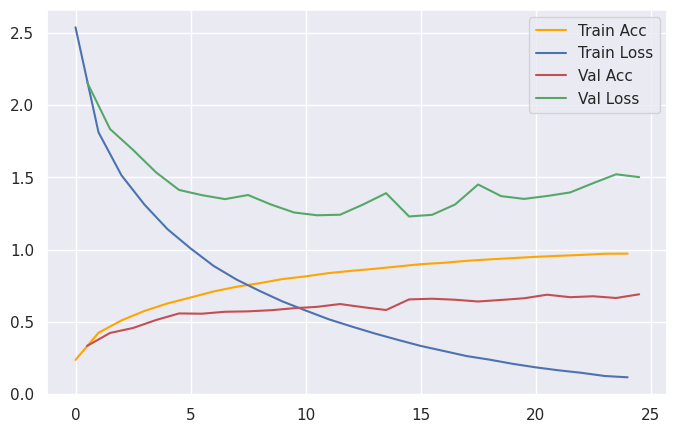

[[0.6942379474639893], [0.7118958830833435], [0.690055787563324]]
----------------------------------------


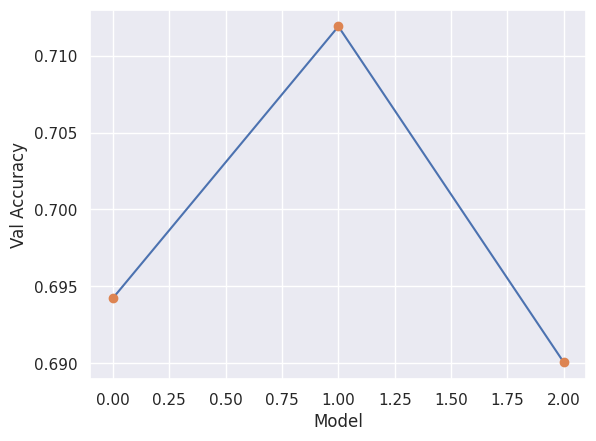

In [90]:
res_dense=[]
# Setting new values
new_hidden_dense=[16, 32, 64]
epoch_new_dense= 25
new_lr_dense=0.001

optimizer_setup = [[keras.optimizers.SGD,new_lr_dense], [keras.optimizers.Adamax,new_lr_dense], [keras.optimizers.Nadam, new_lr_dense]]
for optimizer,lr in optimizer_setup :
    # valacc, history, discard = execute_dense(hidden_sizes[:n], actfn, optimiser, learn_rate, n_epochs, batch_size)
    # plot_history(history)

    model = model_dense_factory(new_hidden_dense,actfn,optimiser,new_lr_dense)
    valacc=execute_layers(model, epoch_new_dense, batch_size,new_lr_dense)
    res_dense += [[valacc]]
print(res_dense)
print("----------------------------------------")
res_dense=np.array(res_dense)
plt.plot(res_dense)
plt.plot(res_dense,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

#### Optimizer optimisation performance for Densely connected

| Optimizer | Accuracy |
|-----------|----------|
| SGD | 0.694 |
| Adamax | 0.712 |
| Nadam | 0.69 |

### Discussion

For the **Densely connected** with learning rate of **0.001** and epoch of **25** and filters of **[16, 32, 64]** the optimiser that performed best was **Adamax**, therefore these will be the parameters chosen for the final model of Densely connected.

## Finalisation
In the optimization process initially a simple model was built for both CNN and Densely connected with 7 layers and 5 layers respectively and the following parameters.
* Number of = 25
* Batch size = 32
* Learning rate =0.001
* Activation function ="elu"
* Optimizer = Adamax
* Hidden layers = [16, 32, 16]

Following which a manual optimisation was done in the following order:
1. Learning Rate
2. Number of layers
3. Optimizers

All of these were done in order while the best parameter chosen was updated for the next step of optimisation, enabling in identifying the best parameter for models (CNN and Densely connected)

The individual parameters that were chosen to build the *best models*.

**CNN**
* Learning rate = 0.01
* Number of epochs = 11
* Hidden layers = [16, 32, 64, 16]
* Optimiser = Adamax
* Batch size = 32
* Activation function = "elu"

**Densely connected**
* Learning rate = 0.001
* Number of = 25
* Hidden Layers=[16, 32, 64]
* Optimiser = adamax
* Batch size = 32
* Activation function = "elu"

*NOTE* - Due to the constraint of computational power the filter sizes chosen being lowest of 16 and highest of 64

# Model Selection

## CNN model 1

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 3, 3, 64)       

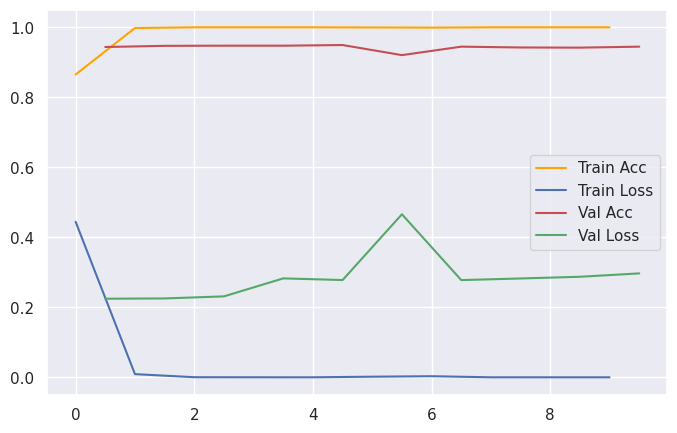

Best validation accuracy: 0.949
Loss against test set: 0.37328922748565674
Accuracy against test set: 0.9390438199043274
157/157 [==============================] - 2s 13ms/step


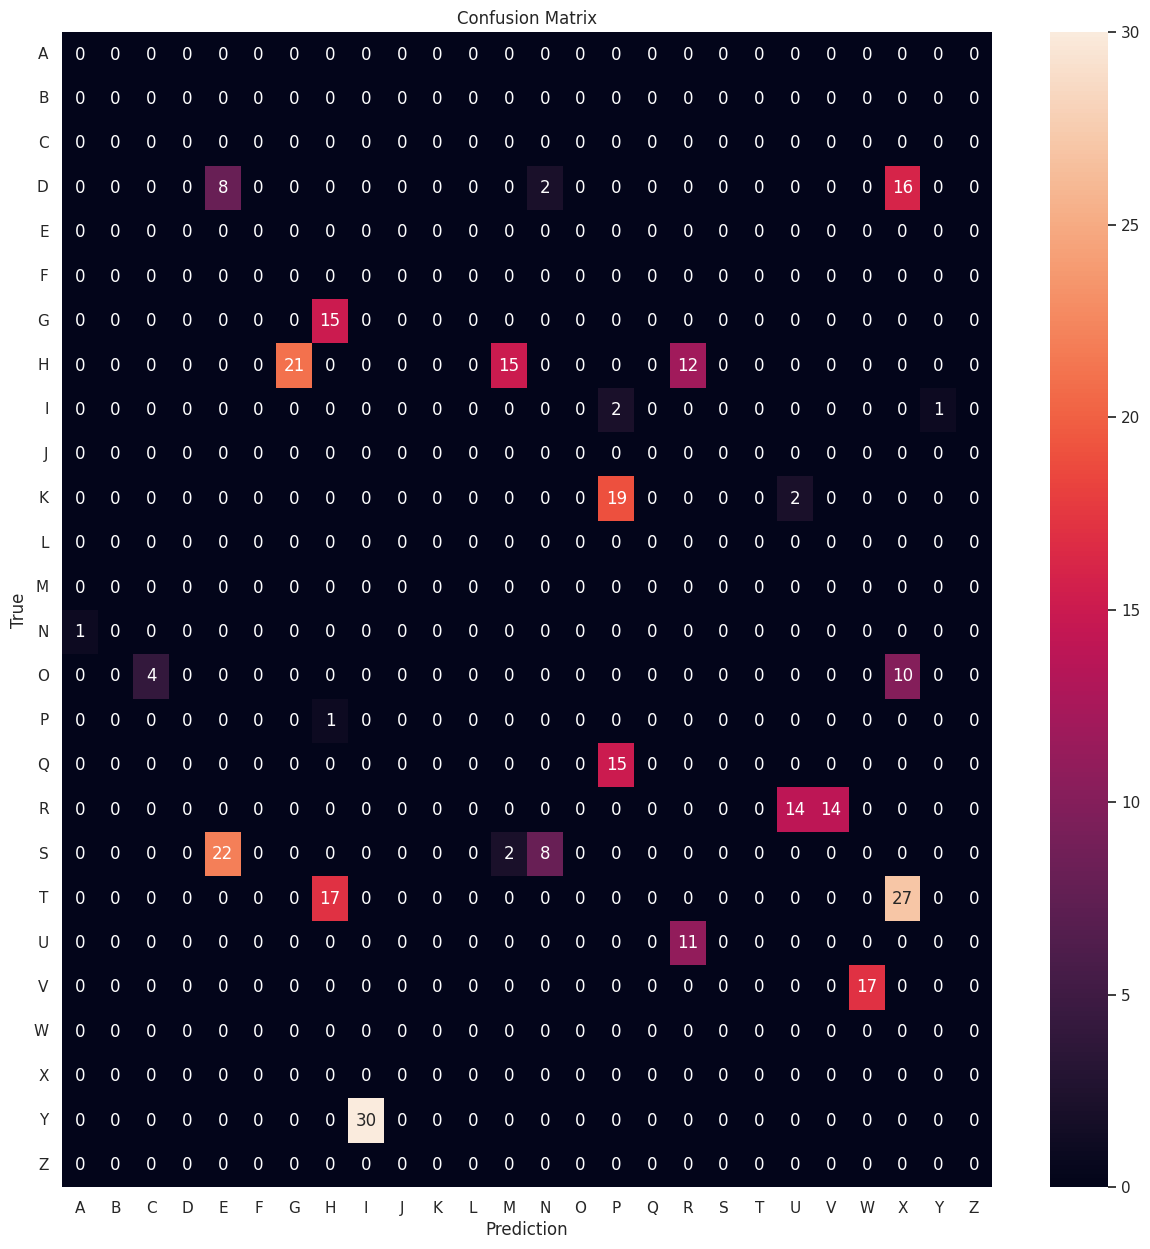

0.9493494629859924

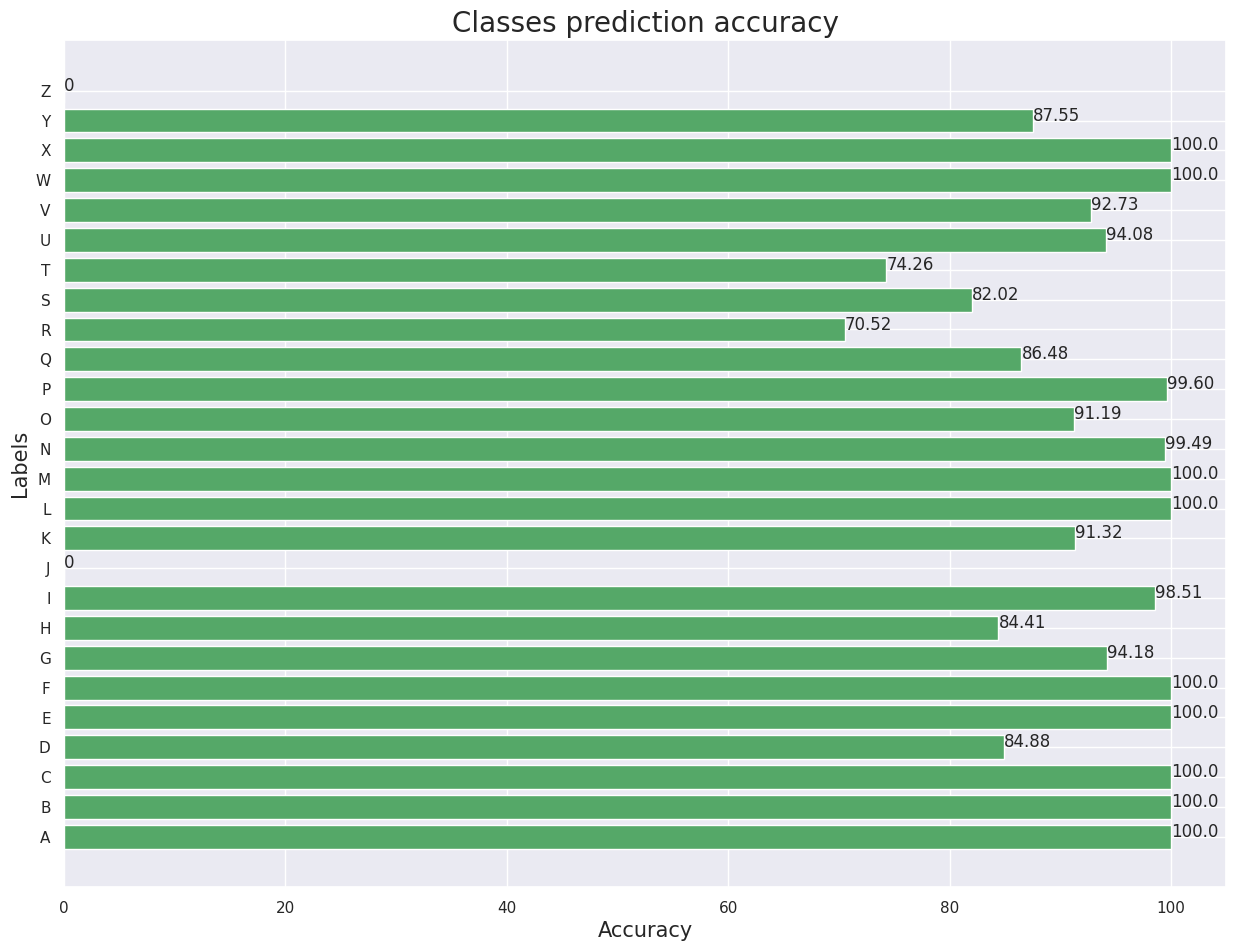

In [96]:
# based on the best parameters
final_lr = 0.01
final_epoch = 11
final_hidden_size=[16,32,64,16]
final_optimiser = keras.optimizers.Adamax
batch_size=32
actfn="elu"

cnn_model_best = model_cnn_factory(final_hidden_size,actfn,final_optimiser,final_lr)
cnn_model_best.summary()
execute(cnn_model_best, final_epoch, batch_size,final_lr)

### CNN model 1 evaluation

The CNN model 1 gives the following scoring:

* Best validation accuracy: 0.949

* Loss against test set: 0.373

* Overall accuracy against test set: 0.939

Classification

* Best correctly classified letter/s:
  * A, B, C, E, F, L, M, W and X (100%)
  * G, K, N, O, P, U and V (above 90%)

* Least correctly classified letter/s :
  * R and T (70% - 75%)

* Most commonly misclassified letter/s:
  * Y misclassified as I (30 misclassifications)
  * T misclassified as X (27 misclassifications)

## Densely Connected model 1

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 16)                12560     
                                                                 
 dense_82 (Dense)            (None, 32)                544       
                                                                 
 dense_83 (Dense)            (None, 64)                2112      
                                                                 
 dense_84 (Dense)            (None, 25)                1625      
                                                                 
Total params: 16,841
Trainable params: 16,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
832/832 [=============================

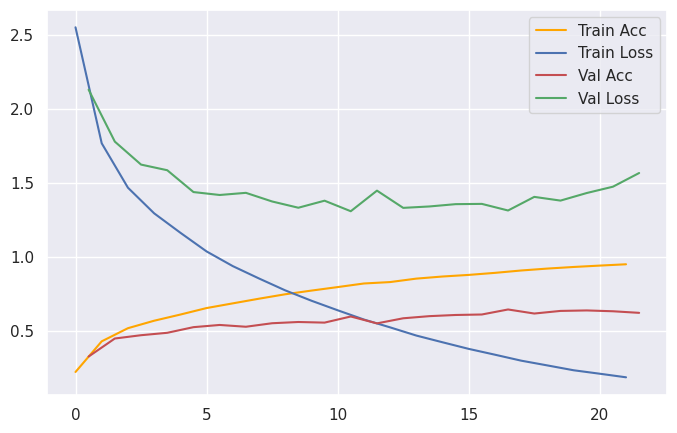

Best validation accuracy: 0.645
Loss against test set: 1.358018159866333
Accuracy against test set: 0.64003986120224
157/157 [==============================] - 0s 2ms/step


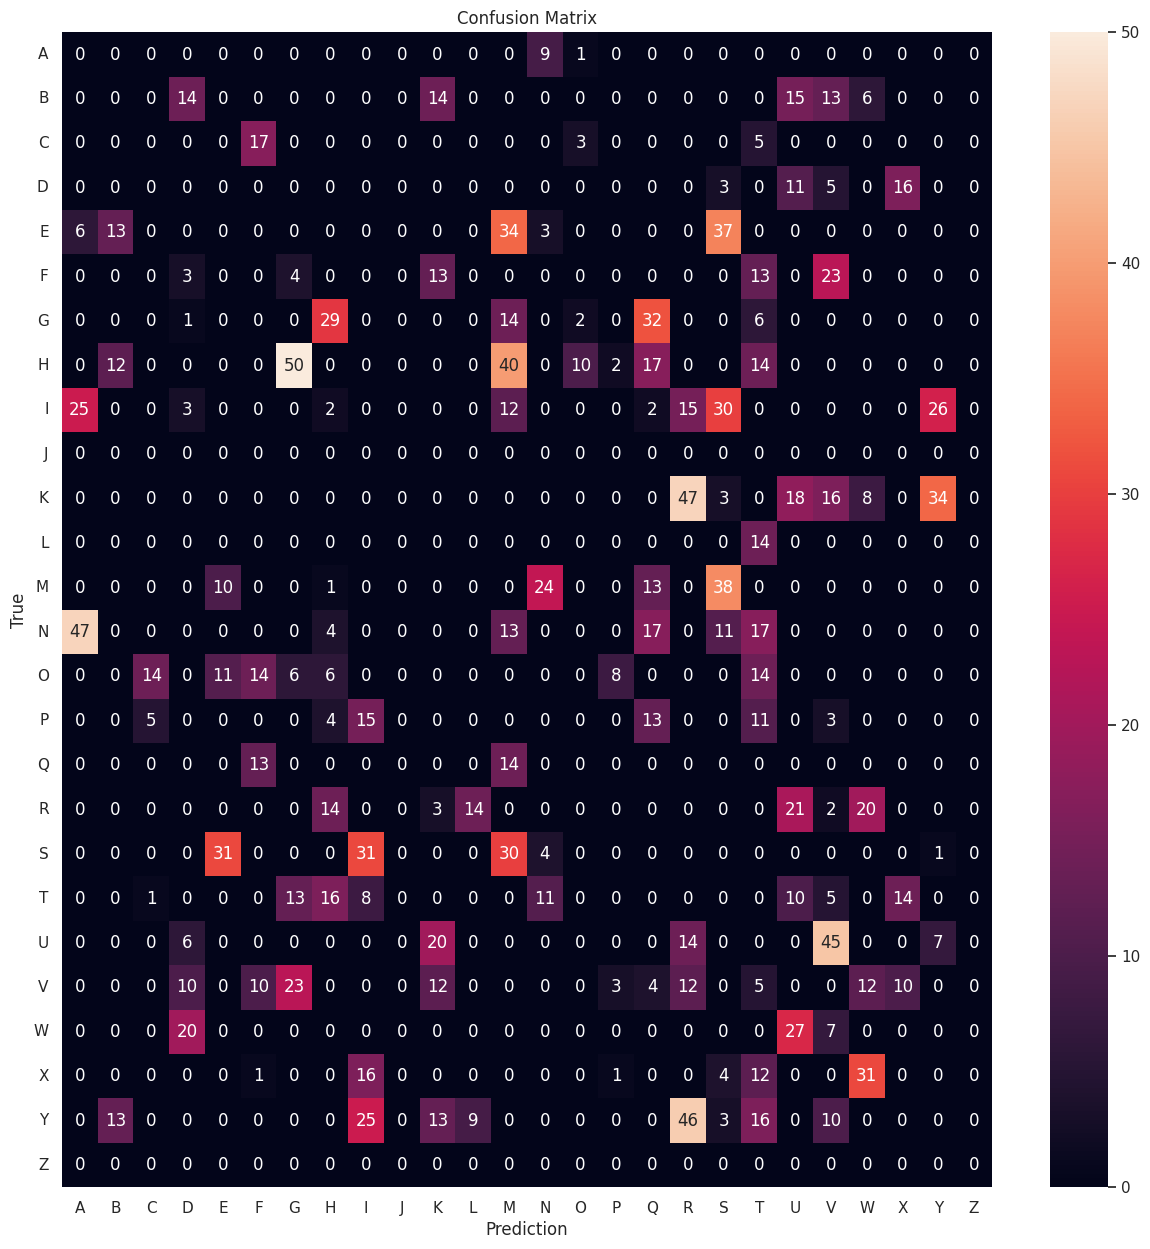

0.6454461216926575

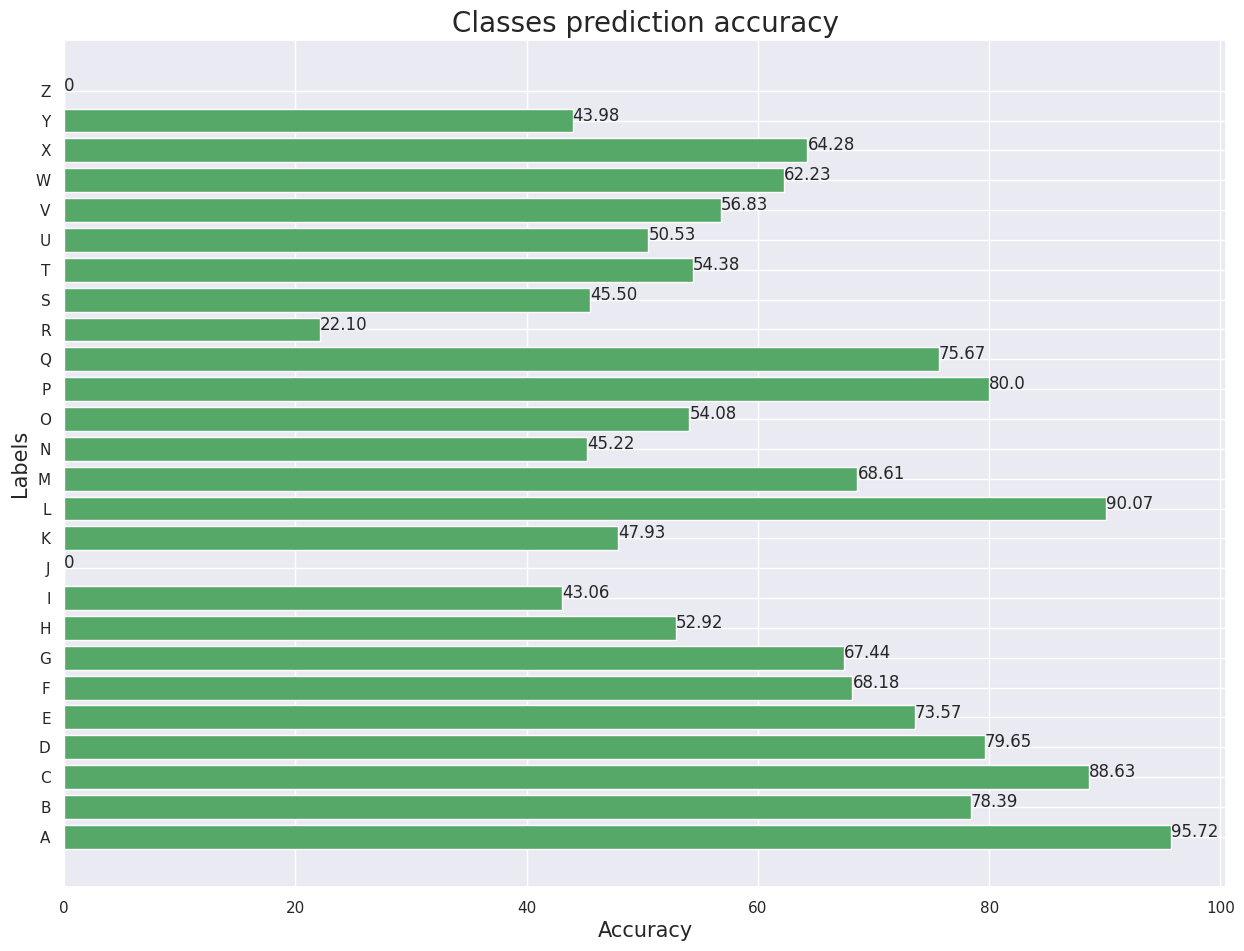

In [92]:
# based on the best parameters
final_lr_dense = 0.001
final_epoch_dense = 25
final_hidden_size_dense=[16,32,64]
final_optimiser_dense = keras.optimizers.Adamax
batch_size=32
actfn="elu"

dense_model_best = model_dense_factory(final_hidden_size_dense,actfn,final_optimiser_dense,final_lr_dense)
dense_model_best.summary()
execute(dense_model_best, final_epoch_dense, batch_size,final_lr_dense)

### Densely connected model 1 evaluation

The Densely connected model 1 gives the following scoring:

* Best validation accuracy: 0.645

* Loss against test set: 1.358

* Overall accuracy against test set: 0.64

Classification

* Best correctly classified letter/s:
  * A and L (above 90%)

* Least correctly classified letter/s :
  * R (less than 25%)

* Most commonly misclassified letter/s:
  * H misclassified as G (50 misclassifications)
  * K misclassified as R (47 misclassifications)
  * N misclassified as A (47 misclassifications)
  * Y misclassified as R (46 misclassifications)
  * U misclassified as V (46 misclassifications)

## CNN model 2

This was built by using the same learning rate, number of epochs, batch size and activation function as CNN model 1, while only changing the hidden layer filter values and the optimizer based on the second best parameter from the optimsation step.

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 7, 7, 16)          4624      
                                                                 
 flatten_41 (Flatten)        (None, 784)             

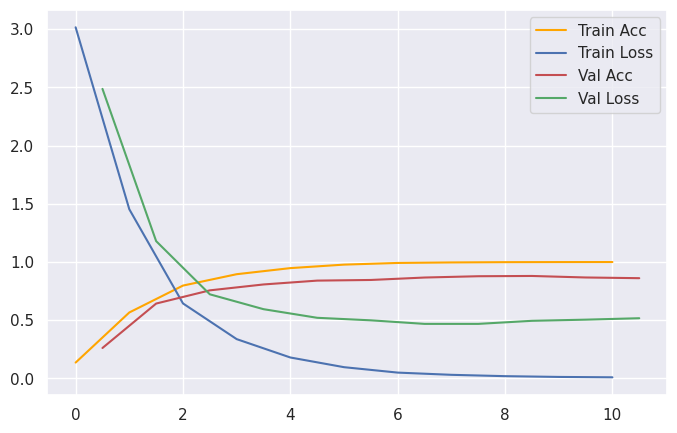

Best validation accuracy: 0.880
Loss against test set: 0.5705357789993286
Accuracy against test set: 0.8581673502922058
157/157 [==============================] - 3s 16ms/step


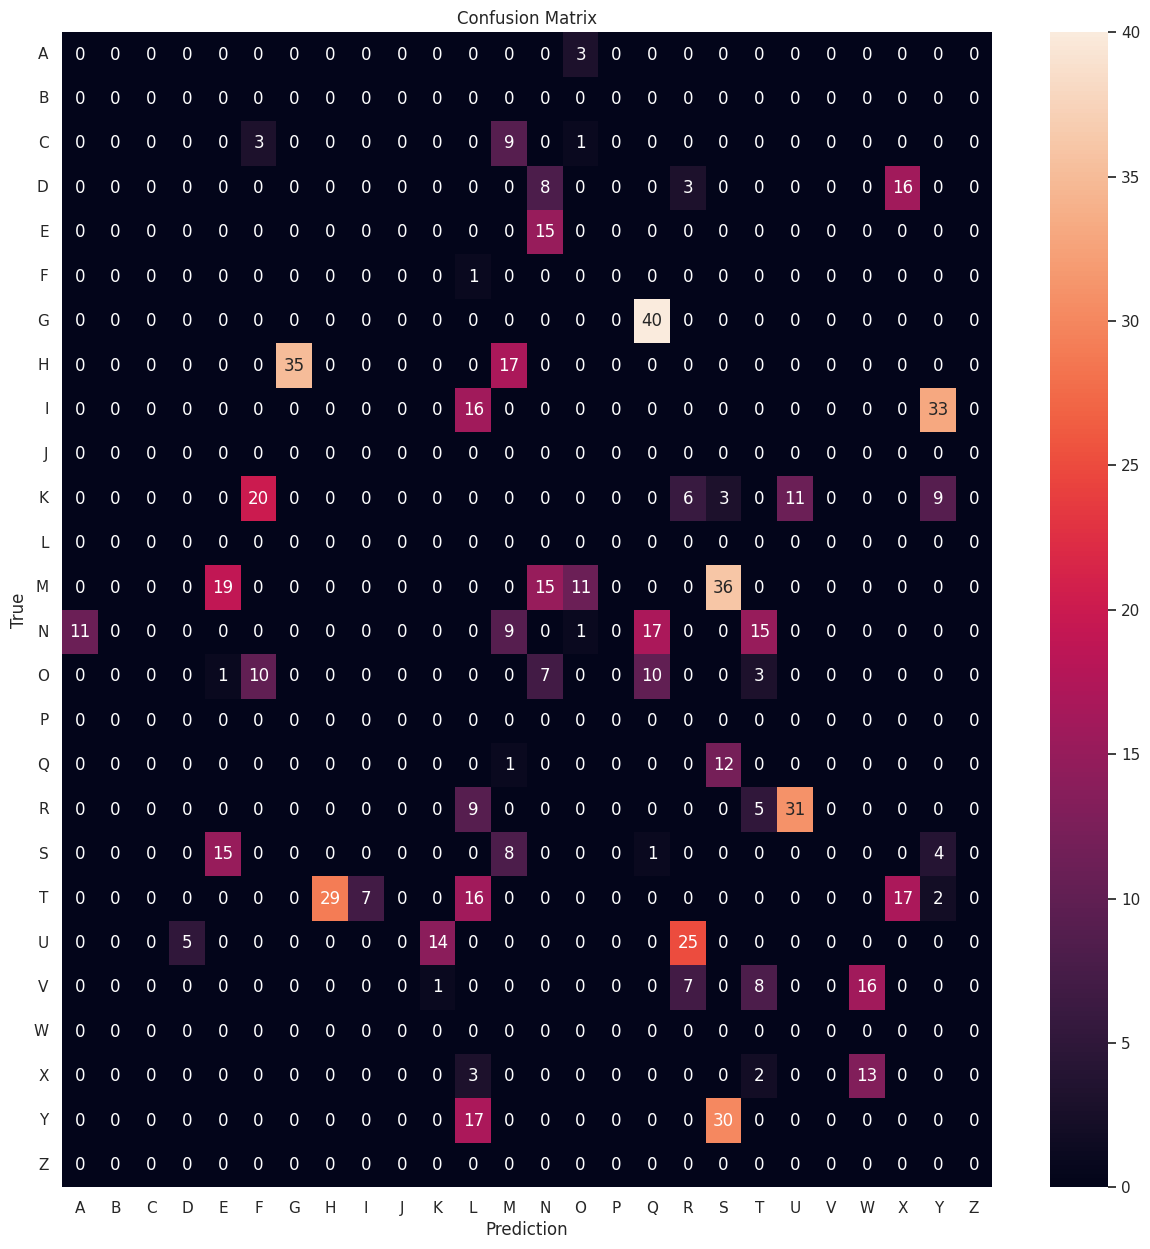

0.8801115155220032

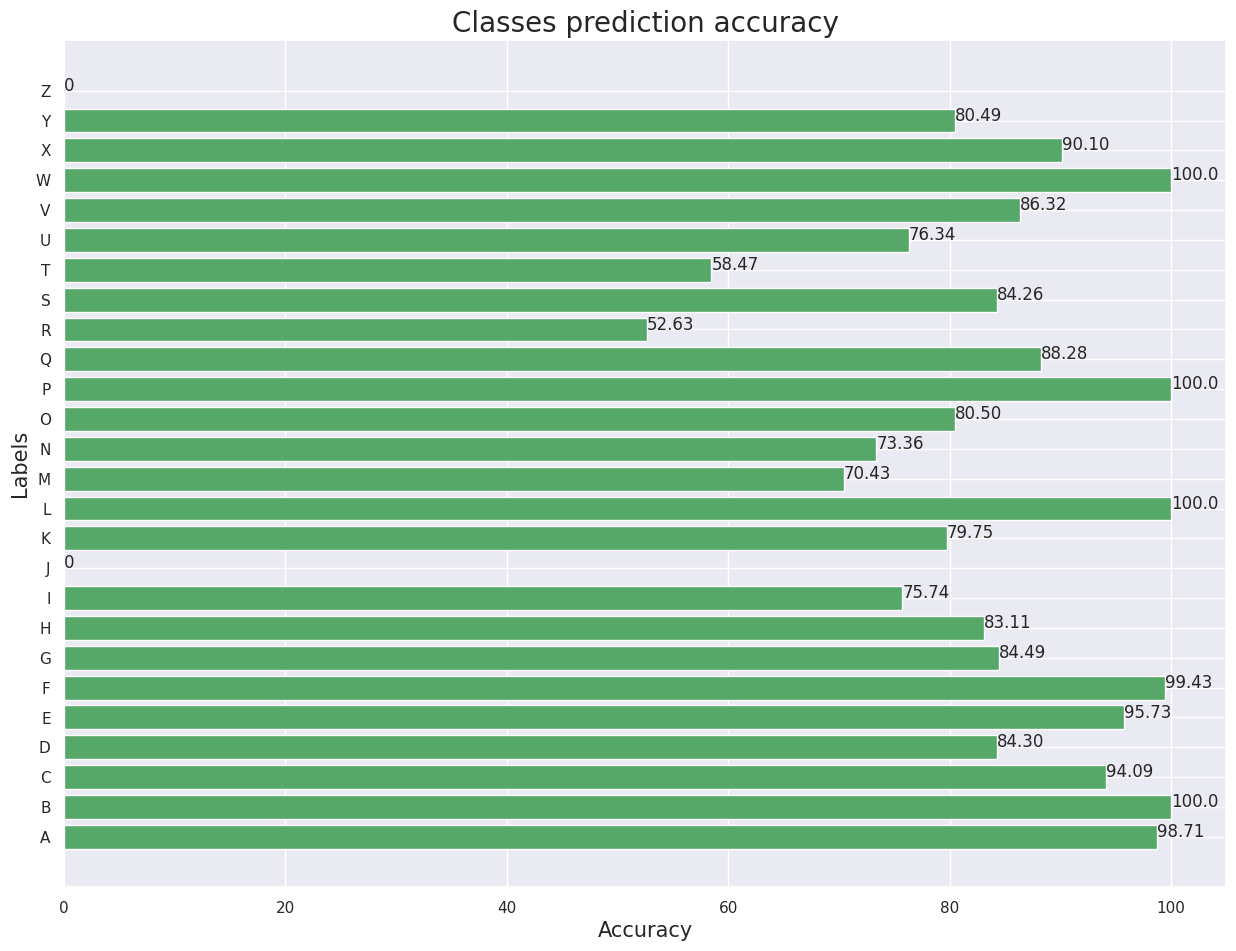

In [93]:
# based on the 2nd best parameters
final_lr = 0.01 #keeping the same learning rate as this gave a better overall performance
final_epoch = 11 #keeping the same epoch as this gave a better overall performance in relation to learning rate
final_hidden_size_2=[16,32,16]
final_optimiser_2 = keras.optimizers.SGD
batch_size=32
actfn="elu"

cnn_model_best_2 = model_cnn_factory(final_hidden_size_2,actfn,final_optimiser_2,final_lr)
cnn_model_best_2.summary()
execute(cnn_model_best_2, final_epoch, batch_size,final_lr)

### CNN model 2 evaluation

The CNN model 2 gives the following scoring:

* Best validation accuracy: 0.88

* Loss against test set: 0.57

* Overall accuracy against test set: 0.858

Classification

* Best correctly classified letter/s:
  * B, L, P and W (100%)
  * A, C, E, F and X(above 90%)

* Least correctly classified letter/s :
  * R and T (50% - 60%)

* Most commonly misclassified letter/s:
  * G misclassified as Q (40 misclassifications)
  * M misclassified as S (36 misclassifications)
  * H misclassified as G (35 misclassifications)

## Densely connected model 2

This was built by using the same learning rate, number of epochs, batch size and activation function as densely connected model 1, while only changing the hidden layer filter values and the optimizer based on the second best parameter from the optimsation step.

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_45 (Flatten)        (None, 784)               0         
                                                                 
 dense_93 (Dense)            (None, 16)                12560     
                                                                 
 dense_94 (Dense)            (None, 32)                544       
                                                                 
 dense_95 (Dense)            (None, 64)                2112      
                                                                 
 dense_96 (Dense)            (None, 16)                1040      
                                                                 
 dense_97 (Dense)            (None, 25)                425       
                                                                 
Total params: 16,681
Trainable params: 16,681
Non-tra

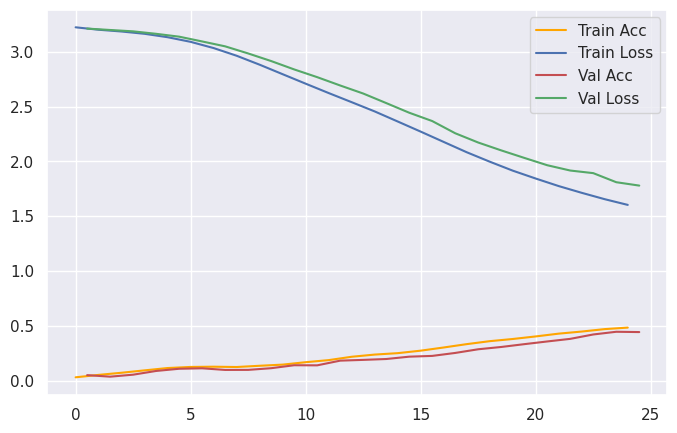

Best validation accuracy: 0.448
Loss against test set: 1.7527800798416138
Accuracy against test set: 0.4492031931877136
157/157 [==============================] - 1s 4ms/step


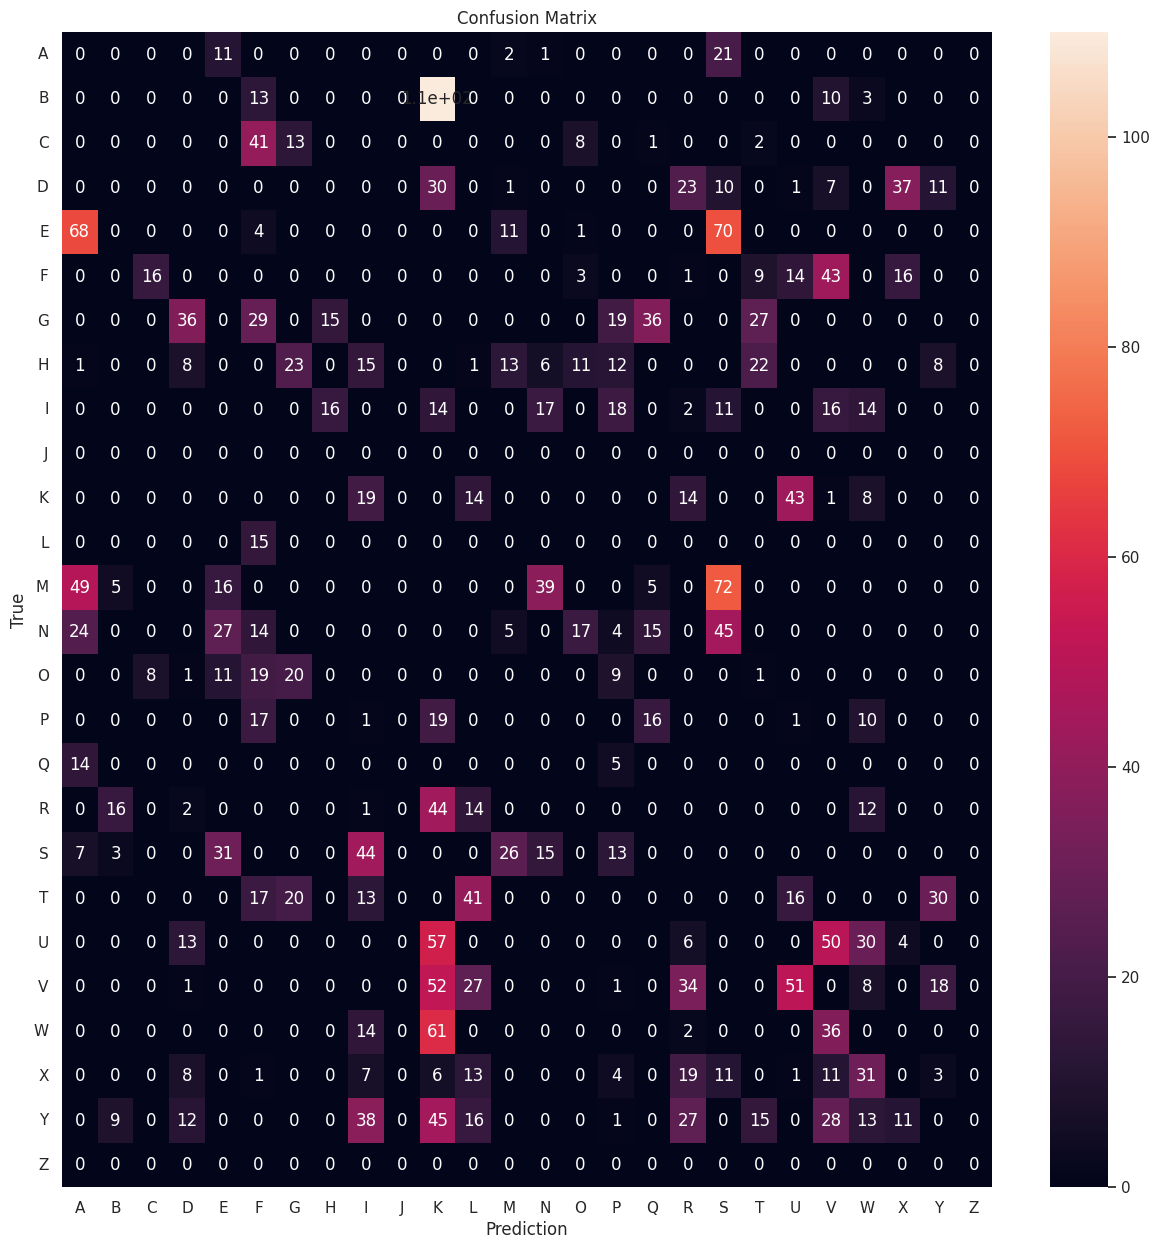

0.44842007756233215

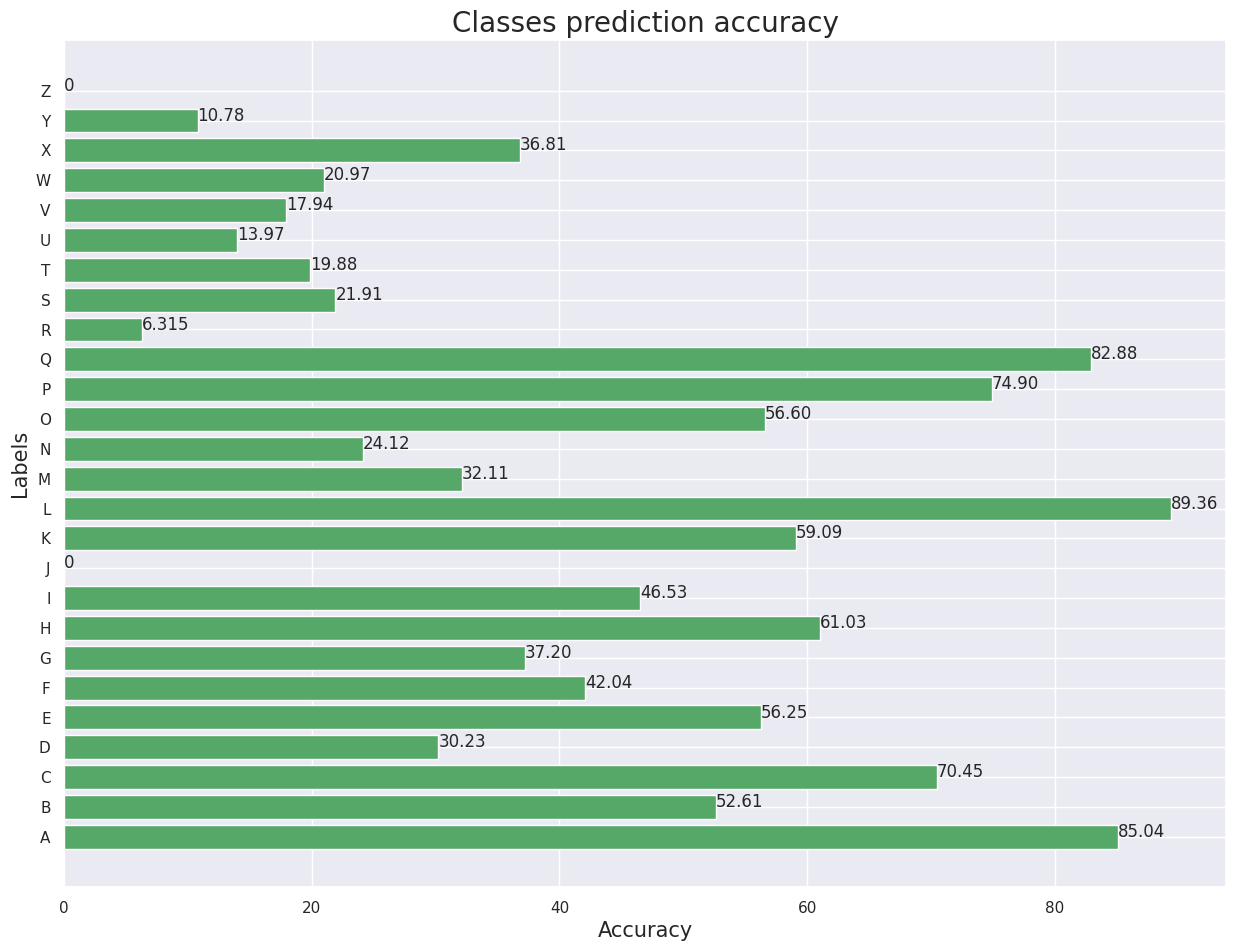

In [100]:
# based on the 2nd best parameters
final_lr_dense = 0.001 #keeping the same learning rate as this gave a better overall performance
final_epoch_dense = 25 #keeping the same epoch as this gave a better overall performance in relation to learning rate
final_hidden_size_dense=[16,32,64,16]
final_optimiser_dense = keras.optimizers.SGD
batch_size=32
actfn="elu"

dense_model_best_2 = model_dense_factory(final_hidden_size_dense,actfn,final_optimiser_dense,final_lr_dense)
dense_model_best_2.summary()
execute(dense_model_best_2, final_epoch_dense, batch_size,final_lr_dense)

### Densely connected model 1 evaluation

The Densely connected model 1 gives the following scoring:

* Best validation accuracy: 0.448

* Loss against test set: 1.753

* Overall accuracy against test set: 0.449

Classification

* Best correctly classified letter/s:
  * A, L and Q (above 80%)

* Least correctly classified letter/s :
  * R (less than 10%)

* Most commonly misclassified letter/s:
  * B misclassified as K
  * M misclassified as S (72 misclassifications)
  * E misclassified as S (70 misclassifications)
  * E misclassified as A (68 misclassifications)

## Model selection - ranking

Based on the overall accuracy of the models built using best parameters.

| | Model | Overall Accuracy|
|-|-|-|
|1| CNN model 1 | 0.939 |
|2| CNN model 2 | 0.858 |
|3| Densely connected model 1 | 0.64 |
|4| Densely connected model 2 | 0.449 |

An interesting observation was that the *letter R and T* are the *least correctly classified letter* in the models in comparison.

*Recomendation* - In the future when compuational power is sufficient the model could be re-trained by increasing the filter sizes to improve the accuracy performance further.

# Statistical Test (p-value test)

In [121]:
# CNN model 1 - Best model - prediction
predict_x_cnn_1=cnn_model_best.predict(X_test)
y_val_pred_1=np.argmax(predict_x_cnn_1,axis=1)

# CNN model 2 - 2nd best model - prediction
predict_x_cnn_2=cnn_model_best_2.predict(X_test)
y_val_pred_2=np.argmax(predict_x_cnn_2,axis=1)

# Densely connected - best model - prediction
predict_x_dense_1=dense_model_best.predict(X_test)
y_val_pred_3=np.argmax(predict_x_dense_1,axis=1)

# Densely connected - 2nd best model - prediction
predict_x_dense_2=dense_model_best_2.predict(X_test)
y_val_pred_4=np.argmax(predict_x_dense_2,axis=1)


157/157 [==============================] - 0s 3ms/step


In [129]:
from sklearn.metrics import f1_score
from mlxtend.evaluate import permutation_test
p_value = permutation_test(y_val_pred_1, y_val_pred_2, paired=True,
                            func=lambda x, y: np.abs(f1_score(y_test,x,average="macro") - f1_score(y_test,y,average="macro")),
                            method="approximate", seed=0, num_rounds=1000)

print(f'P value comparing methods CNN model 1 and CNN model 2: {p_value:.3f}')
print(f'\nThreshold is 0.05, where P value needs to be *below* this for significance')

P value comparing methods CNN model 1 and CNN model 2: 0.001

Threshold is 0.05, where P value needs to be *below* this for significance


In [137]:
p_value2 = permutation_test(y_val_pred_1, y_val_pred_2, paired=True,
                            func=lambda x, y: np.abs(f1_score(y_test,x,average="macro") - f1_score(y_test,y,average="macro")),
                            method="approximate", seed=0, num_rounds=1000)

print(f'P value comparing methods Densely connected model 1 and Densely connected model 2: {p_value2:.3f}')
print(f'\nThreshold is 0.05, where P value needs to be *below* this for significance')

P value comparing methods Densely connected model 1 and Densely connected model 2: 0.001

Threshold is 0.05, where P value needs to be *below* this for significance


Since the p-value is below the threshold, it can be said that it is statistically unlikely that our data showed a difference (comparing model 1 to model 2).

*NOTE* - **F1-Score** was selected for the permutation test as it would reflect in the best interest of the prediction as the test dataset doesn't have an equal distribution of classes while the training dataset does.

# Conclusion

Based on the final model implementation and the p-value tests, The best model for future predictions would be CNN model 1 which had an overall accuracy of 	93.9% in the test dataset with the following parameters:
* Learning Rate = 0.01
* Number of epochs = 11
* Hidden layer filters = [16, 32, 64, 16]
* Optimiser = Adamax
* Batch size = 32
* Activation function = "elu"

Letter with the lowest individual accuracy: R and T

The letter with most common error: H, M and Y.